# Exploratory Data Analysis

Data used in this EDA are assembled from multiple sources from 2005 - 2015

__Table of Contents__
1. <a href='#intro'>Introduction</a>
2. <a href='#distr'>Distribution</a>
    1. <a href='#h2h'>Head-To-Head Results (win - draw)</a>
    2. <a href='#form'>Performance in 10 recent matches (goal for, goal against, win,draw)</a>
    3. <a href='#betodd'>Bet Odd (win,draw)</a>
    

1. <a href='#wc2010'>FIFA World Cup 2010</a>

### Introduction <a id ='intro'></a> 
__Objective:__
- Prediction of the winner of an international matches Prediction results are "Win / Lose / Draw"
- Apply the model to predict the result of FIFA world cup 2018.
__Data:__ Data are assembled from multiple sources, most of them are from Kaggle, others come from FIFA website / EA games.

__Feature Engineering:__ To determine who will more likely to win a match, based on my knowledge, I come up with 4 main groups of features as follows:

- head-to-head match history
- recent performance of each team (10 recent matches), aka "form"
- bet-ratio before matches
- squad value or how many players are in top 200 (from video game) Feature list reflects those factors.

In [19]:
# Load library
import csv
import pandas as pd
import numpy as np
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import datetime as dt

In [20]:
# Read data
data = pd.read_csv("data/data_odd_2005.csv", encoding='utf-8')
# data['date'] = pd.to_datetime(data['date'])

In [21]:
data.head()

,id,date,team_1,team_2,home_team,tournament,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2,result
0,26989,2/8/2005,Finland,Latvia,Latvia,Cyprus International Tournament,3,2,16,17,12,18,5,2,0,2,2.2343,3.1929,2.8000,win
1,27011,2/9/2005,Japan,North Korea,Japan,FIFA World Cup qualification,0,3,11,17,18,11,6,3,2,3,1.3180,4.1900,8.6980,win
2,27025,2/9/2005,Saudi Arabia,Uzbekistan,Uzbekistan,FIFA World Cup qualification,0,0,17,15,9,12,6,6,2,2,3.1000,3.2000,2.0467,draw
3,26994,2/9/2005,Bahrain,Iran,Bahrain,FIFA World Cup qualification,0,1,20,20,12,16,3,6,4,3,2.4629,3.1786,2.5429,draw
4,27005,2/9/2005,Denmark,Greece,Greece,FIFA World Cup qualification,5,3,11,8,17,8,3,4,5,4,3.0778,3.0667,2.1478,lose


### Distribution <a id ='distr'></a> 

__Head-To-Head Results (win - draw)__ <a id ='h2h'></a> 

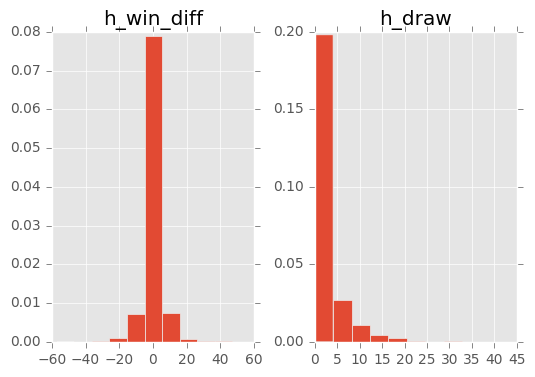

In [58]:
fig, axes = plt.subplots(1, 2)
data.hist('h_win_diff',ax = axes[0],normed=True)
data.hist('h_draw',ax = axes[1],normed=True)
plt.show()

__Performance in 10 recent matches (goal for, goal against, win,draw)__ <a id ='form'></a> 

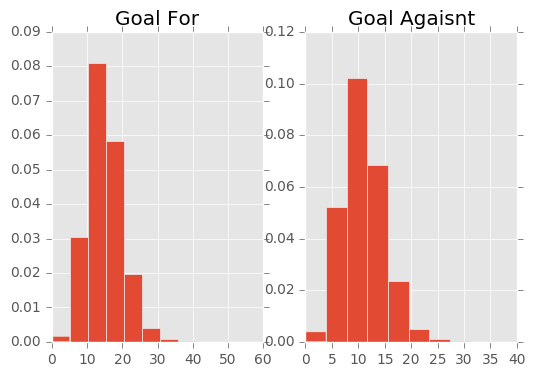

In [59]:
fig, axes = plt.subplots(1, 2)
f_goalF = pd.concat([data['f_goalF_1'],data['f_goalF_2']])
axes[0].hist(f_goalF,normed=True)
axes[0].set_title('Goal For')

f_goalA = pd.concat([data['f_goalA_1'],data['f_goalA_2']])
axes[1].hist(f_goalA,normed=True)
axes[1].set_title('Goal Agaisnt')
plt.show()

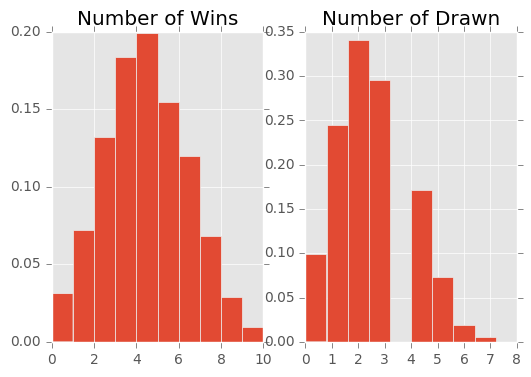

In [57]:
fig, axes = plt.subplots(1, 2)
f_win = pd.concat([data['f_win_1'],data['f_win_2']])
axes[0].hist(f_win,normed=True)
axes[0].set_title('Number of Wins')

f_draw = pd.concat([data['f_draw_1'],data['f_draw_2']])
axes[1].hist(f_draw,normed=True)
axes[1].set_title('Number of Drawn')
plt.show()

__Bet Odd (win,draw)__ <a id ='betodd'></a> 

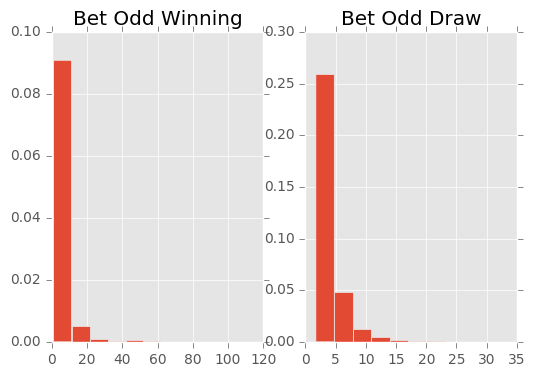

In [56]:
fig, axes = plt.subplots(1, 2)
bet_odd_win = pd.concat([data['avg_odds_win_1'],data['avg_odds_win_2']])
axes[0].hist(bet_odd_win,normed = True)
axes[0].set_title('Bet Odd Winning')

axes[1].hist(data['avg_odds_draw'],normed = True)
axes[1].set_title('Bet Odd Draw')
plt.show()

### Investigate squad strength effect to results

1. <a id ='wc2010'></a> FIFA World Cup 2010
2. <a id ='wc2014'></a> FIFA World Cup 2014
3. <a id ='er2012'></a> UEFA EURO 2012
4. <a id ='er2016'></a> UEFA EURO 2016

#### FIFA WORLD CUP 2010

In [38]:
data_WC_2010_ = data[(data['tournament'] == 'FIFA World Cup') & (data['date'].dt.year == 2010 )]
squad_strength = pd.read_csv("web_crawler/squad/squad_strength/2010_FIFA_World_Cup_squad_strength.csv", encoding='utf-8')

In [39]:
data_WC_2010_.tail(5)

,id,date,team_1,team_2,home_team,tournament,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2,result
2536,31734,2010-07-03,Paraguay,Spain,Paraguay,FIFA World Cup,-1,2,7,18,11,18,3,9,5,0,8.8437,4.2441,1.4126,lose
2537,31736,2010-07-06,Netherlands,Uruguay,Uruguay,FIFA World Cup,0,0,20,9,7,14,8,7,2,2,1.6993,3.4800,5.5044,win
2538,31737,2010-07-07,Germany,Spain,Germany,FIFA World Cup,2,6,17,17,11,13,6,9,2,0,2.7730,3.3185,2.5422,lose
2540,31740,2010-07-10,Germany,Uruguay,Uruguay,FIFA World Cup,6,2,16,9,14,13,7,6,1,3,1.9070,3.6104,3.8878,win
2541,31741,2010-07-11,Netherlands,Spain,Netherlands,FIFA World Cup,1,1,22,15,8,13,9,9,1,0,3.7785,3.3515,2.0333,lose


In [40]:
data_WC_2010_.shape

(59, 20)

In [31]:
squad_strength.head()

,Nation,TeamInformation_RivalTeam,TeamInformation_Attack,TeamInformation_Midfield,TeamInformation_Defence,BuildUpPlay_Speed,BuildUpPlay_Passing,BuildUpPlay_Positioning,ChanceCreation_Passing,ChanceCreation_Crossing,...,Defence_Pressure,Defence_Aggression,Defence_TeamWidth,Defence_DefenderLine,PlayerRoles_Captain,PlayerRoles_ShortFreeKick,PlayerRoles_LongFreeKick,PlayerRoles_Penalties,PlayerRoles_LeftCorner,PlayerRoles_RightCorner
0,France,Italy,83,83,80,54,45,Organised,67,50,...,50,53,41,Cover,Mexes,Gourcuff,Gourcuff,Ribery,Gourcuff,Malouda
1,Mexico,United States,78,78,76,39,43,Organised,37,68,...,47,47,53,Cover,Marquez,Guardado,Marquez,Marquez,Guardado,dos Santos
2,South Africa,Cameroon,74,71,70,41,24,Organised,55,59,...,39,44,64,Cover,Mokoena,Modise,Pienaar,Mphela,Tshabalala,Tshabalala
3,Uruguay,Argentina,83,74,79,51,41,Organised,65,54,...,30,58,45,Cover,Lugano,Forlan,Forlan,Forlan,Forlan,Forlan
4,Argentina,Brazil,85,81,80,57,32,Organised,70,41,...,41,43,56,Cover,Mascherano,Messi,Messi,Messi,Messi,Messi


In [35]:
squad_strength.shape

(24, 22)

In [36]:
list_nation = squad_strength['Nation'].unique()
list_nation

array(['France', 'Mexico', 'South Africa', 'Uruguay', 'Argentina',
       'Greece', 'Korea Republic', 'England', 'Slovenia', 'United States',
       'Australia', 'Germany', 'Cameroon', 'Denmark', 'Holland', 'Italy',
       'New Zealand', 'Paraguay', 'Brazil', "Cote d'Ivoire", 'Portugal',
       'Chile', 'Spain', 'Switzerland'], dtype=object)

In [74]:
data_WC_2010 = data_WC_2010_[(data_WC_2010_['team_1'].isin(list_nation)) & (data_WC_2010_['team_2'].isin(list_nation))]
data_WC_2010.head()

,id,date,team_1,team_2,home_team,tournament,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2,result
2474,31666,2010-06-11,Mexico,South Africa,South Africa,FIFA World Cup,1,0,17,19,4,4,6,5,2,5,2.5323,3.1050,2.9204,draw
2475,31667,2010-06-11,France,Uruguay,Uruguay,FIFA World Cup,0,2,14,9,10,14,5,4,4,2,2.2007,3.1422,3.4881,draw
2479,31672,2010-06-13,Australia,Germany,Germany,FIFA World Cup,-2,0,13,14,10,17,7,7,2,2,7.1665,3.8581,1.5092,lose
2482,31674,2010-06-14,Italy,Paraguay,Italy,FIFA World Cup,2,0,9,10,11,11,4,3,4,3,2.1263,3.0230,3.8074,draw
2486,31682,2010-06-16,Spain,Switzerland,Spain,FIFA World Cup,15,3,20,7,20,12,10,4,0,3,1.2615,5.2088,13.3827,lose


In [75]:
data_WC_2010.shape

(25, 20)

In [83]:
win_result = data_WC_2010[data_WC_2010['result'] == 'win']
lose_result = data_WC_2010[data_WC_2010['result'] == 'lose']
draw_result = data_WC_2010[data_WC_2010['result'] == 'draw']

winner = pd.concat([win_result['team_1'], lose_result['team_2']])
loser = pd.concat([lose_result['team_1'], win_result['team_2']])

winner = winner.to_frame('Nation')
loser = loser.to_frame('Nation')

winner_join = pd.merge(winner,squad_strength,how='left', on='Nation')
loser_join = pd.merge(loser,squad_strength,how='left', on='Nation')

In [96]:
winner_join.describe()

,TeamInformation_Attack,TeamInformation_Midfield,TeamInformation_Defence,BuildUpPlay_Speed,BuildUpPlay_Passing,ChanceCreation_Passing,ChanceCreation_Crossing,ChanceCreation_Shooting,Defence_Pressure,Defence_Aggression,Defence_TeamWidth
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,81.894737,79.894737,79.684211,60.210526,36.473684,55.263158,49.526316,54.578947,49.263158,50.736842,55.578947
std,4.026230,4.433393,3.888053,14.604333,10.265197,10.283979,10.073995,8.221353,10.603155,6.261364,8.694288
min,74.000000,71.000000,70.000000,39.000000,23.000000,35.000000,37.000000,38.000000,30.000000,43.000000,35.000000
25%,80.000000,77.000000,77.500000,50.500000,27.000000,50.000000,41.000000,55.000000,44.000000,46.000000,52.000000
50%,83.000000,81.000000,81.000000,57.000000,41.000000,57.000000,53.000000,56.000000,48.000000,49.000000,55.000000
75%,85.000000,83.000000,82.500000,73.000000,42.000000,63.500000,54.000000,57.000000,60.500000,58.000000,63.500000
max,86.000000,85.000000,84.000000,77.000000,57.000000,70.000000,71.000000,69.000000,68.000000,58.000000,67.000000


In [97]:
loser_join.describe()

,TeamInformation_Attack,TeamInformation_Midfield,TeamInformation_Defence,BuildUpPlay_Speed,BuildUpPlay_Passing,ChanceCreation_Passing,ChanceCreation_Crossing,ChanceCreation_Shooting,Defence_Pressure,Defence_Aggression,Defence_TeamWidth
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,79.210526,78.263158,76.842105,49.947368,42.105263,50.421053,55.368421,50.578947,47.263158,52.368421,51.105263
std,4.049403,4.292657,4.086062,13.814138,10.142839,14.952948,10.802317,10.473861,12.462576,7.220423,9.397959
min,73.000000,71.000000,70.000000,22.000000,23.000000,26.000000,37.000000,38.000000,20.000000,42.000000,35.000000
25%,76.000000,75.000000,74.500000,39.500000,38.000000,36.500000,46.500000,40.000000,40.000000,47.000000,44.500000
50%,78.000000,78.000000,76.000000,50.000000,43.000000,55.000000,54.000000,54.000000,47.000000,53.000000,52.000000
75%,83.000000,81.000000,80.000000,55.500000,47.500000,64.000000,65.000000,57.000000,54.000000,56.500000,55.500000
max,86.000000,85.000000,84.000000,77.000000,57.000000,70.000000,71.000000,69.000000,68.000000,70.000000,67.000000


In [119]:
feature_list = loser_join.columns.tolist()
feature_list

['Nation',
 'TeamInformation_RivalTeam',
 'TeamInformation_Attack',
 'TeamInformation_Midfield',
 'TeamInformation_Defence',
 'BuildUpPlay_Speed',
 'BuildUpPlay_Passing',
 'BuildUpPlay_Positioning',
 'ChanceCreation_Passing',
 'ChanceCreation_Crossing',
 'ChanceCreation_Shooting',
 'ChanceCreation_Positioning',
 'Defence_Pressure',
 'Defence_Aggression',
 'Defence_TeamWidth',
 'Defence_DefenderLine',
 'PlayerRoles_Captain',
 'PlayerRoles_ShortFreeKick',
 'PlayerRoles_LongFreeKick',
 'PlayerRoles_Penalties',
 'PlayerRoles_LeftCorner',
 'PlayerRoles_RightCorner']

In [127]:
print(loser_join['BuildUpPlay_Positioning'].value_counts())
print(winner_join['BuildUpPlay_Positioning'].value_counts())

Organised    18
Free Form     1
Name: BuildUpPlay_Positioning, dtype: int64
Organised    14
Free Form     5
Name: BuildUpPlay_Positioning, dtype: int64


In [128]:
print(loser_join['ChanceCreation_Positioning'].value_counts())
print(winner_join['ChanceCreation_Positioning'].value_counts())

Organised    16
Free Form     3
Name: ChanceCreation_Positioning, dtype: int64
Organised    12
Free Form     7
Name: ChanceCreation_Positioning, dtype: int64


In [129]:
print(loser_join['Defence_DefenderLine'].value_counts())
print(winner_join['Defence_DefenderLine'].value_counts())

Cover    19
Name: Defence_DefenderLine, dtype: int64
Cover    19
Name: Defence_DefenderLine, dtype: int64


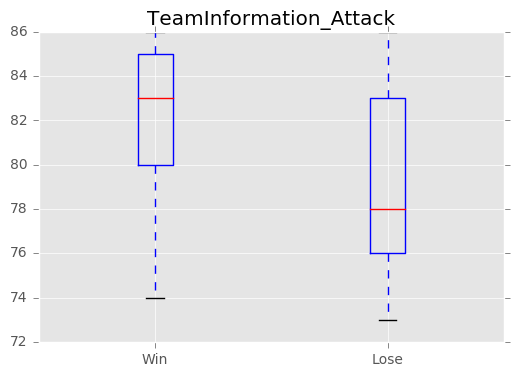

Ttest_indResult(statistic=2.0489438088213374, pvalue=0.047810475702764921)


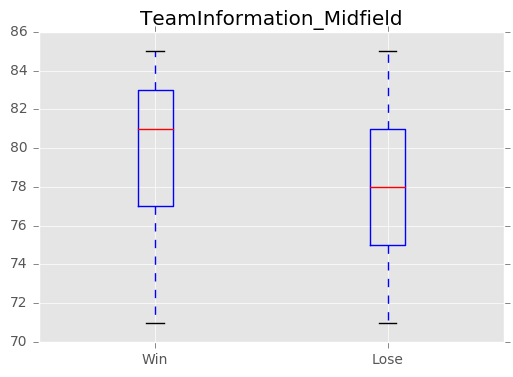

Ttest_indResult(statistic=1.1524597132496202, pvalue=0.25672776509249701)


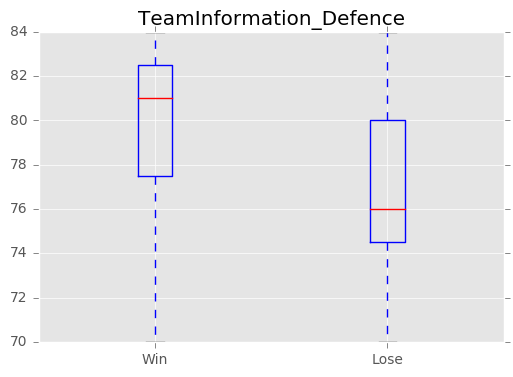

Ttest_indResult(statistic=2.1964208854139011, pvalue=0.034585984344498256)


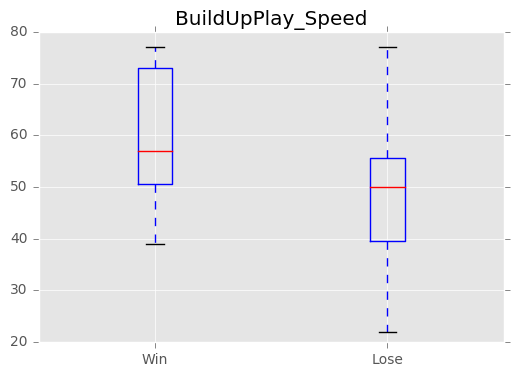

Ttest_indResult(statistic=2.2253804719562256, pvalue=0.032409157946118441)


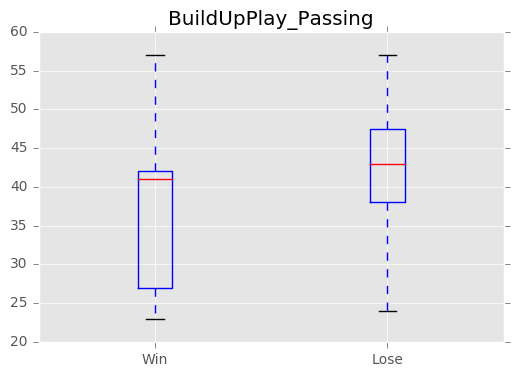

Ttest_indResult(statistic=-1.7010338175392079, pvalue=0.097560490401867594)
This is a category:  BuildUpPlay_Positioning


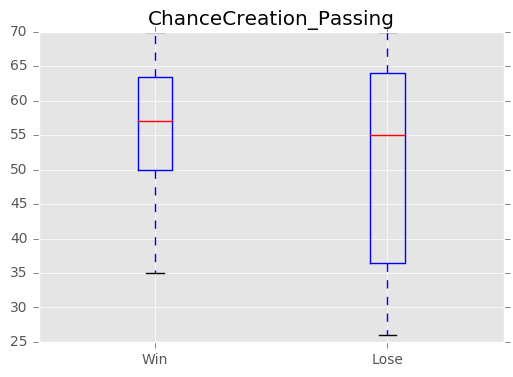

Ttest_indResult(statistic=1.1630050877690712, pvalue=0.25247878498271364)


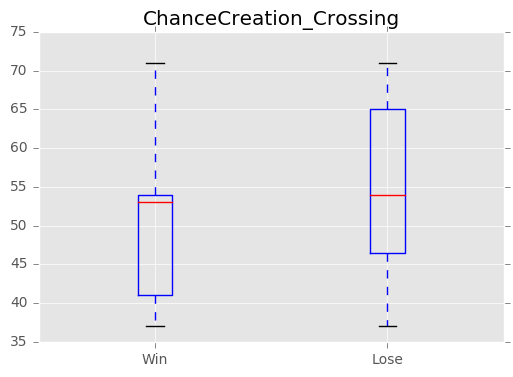

Ttest_indResult(statistic=-1.724023770357906, pvalue=0.093282434372624526)


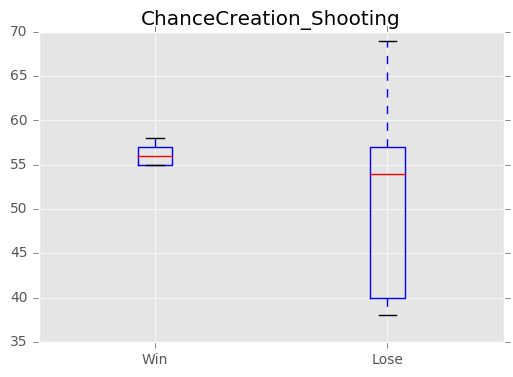

Ttest_indResult(statistic=1.3094584880070976, pvalue=0.19867510754814133)
This is a category:  ChanceCreation_Positioning


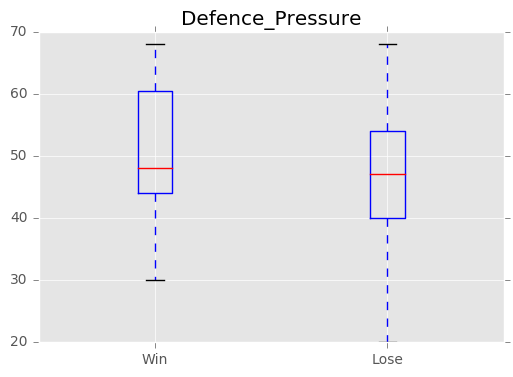

Ttest_indResult(statistic=0.53278008756137329, pvalue=0.59745948113683145)


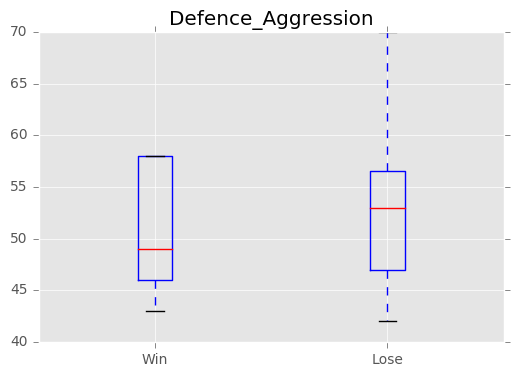

Ttest_indResult(statistic=-0.74414288915339499, pvalue=0.46161992393987572)


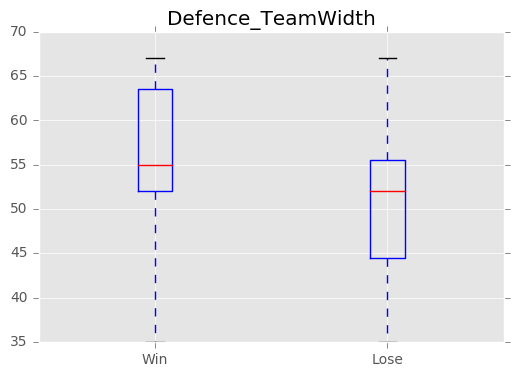

Ttest_indResult(statistic=1.523127918356842, pvalue=0.13646368313456905)
This is a category:  Defence_DefenderLine


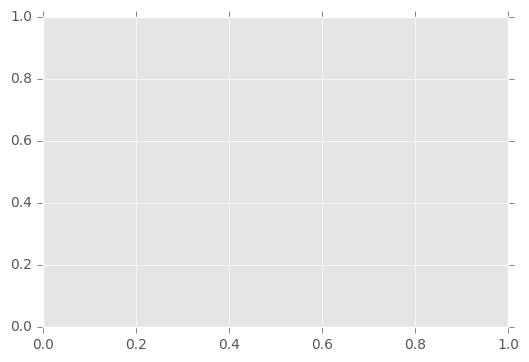

In [142]:
plt.style.use('ggplot')
plt.figure()
# feature_name = 'BuildUpPlay_Passing'
# feature_name = 'ChanceCreation_Shooting'
# feature_name = 'ChanceCreation_Crossing'
# feature_name = 'Defence_TeamWidth'
for feature_name in feature_list[2:16]:
    try:
        plt.boxplot([winner_join[feature_name],loser_join[feature_name]],labels=['Win','Lose'],showfliers=False)

        plt.title(feature_name)

        plt.show()
        
        print(ttest_ind(winner_join[feature_name],loser_join[feature_name]))
    except:
        print("This is a category: ",feature_name)

In [141]:
# feature_name = feature_list[4]
feature_name = 'ChanceCreation_Shooting'
print(feature_name)
ttest_ind(winner_join[feature_name],loser_join[feature_name])

ChanceCreation_Shooting


Ttest_indResult(statistic=1.3094584880070976, pvalue=0.19867510754814133)

In [139]:
squad_strength.corr()

,TeamInformation_Attack,TeamInformation_Midfield,TeamInformation_Defence,BuildUpPlay_Speed,BuildUpPlay_Passing,ChanceCreation_Passing,ChanceCreation_Crossing,ChanceCreation_Shooting,Defence_Pressure,Defence_Aggression,Defence_TeamWidth
TeamInformation_Attack,1.000000,0.814932,0.843516,0.289630,-0.589321,0.486576,-0.213334,0.437897,0.143466,-0.377724,0.133950
TeamInformation_Midfield,0.814932,1.000000,0.866638,0.144205,-0.469112,0.241033,-0.118846,0.353901,0.357137,-0.336793,0.106802
TeamInformation_Defence,0.843516,0.866638,1.000000,0.303005,-0.469905,0.397839,0.029163,0.353304,0.244341,-0.353170,0.296169
BuildUpPlay_Speed,0.289630,0.144205,0.303005,1.000000,-0.088366,0.463248,-0.083644,0.438233,0.429878,-0.188611,0.227555
BuildUpPlay_Passing,-0.589321,-0.469112,-0.469905,-0.088366,1.000000,-0.160891,0.051786,0.016156,-0.045463,0.625567,-0.474738
ChanceCreation_Passing,0.486576,0.241033,0.397839,0.463248,-0.160891,1.000000,-0.141364,0.531874,0.036058,-0.067515,0.047576
ChanceCreation_Crossing,-0.213334,-0.118846,0.029163,-0.083644,0.051786,-0.141364,1.000000,-0.236932,-0.275952,0.239261,0.191378
ChanceCreation_Shooting,0.437897,0.353901,0.353304,0.438233,0.016156,0.531874,-0.236932,1.000000,0.363944,-0.012264,-0.055694
Defence_Pressure,0.143466,0.357137,0.244341,0.429878,-0.045463,0.036058,-0.275952,0.363944,1.000000,-0.239085,0.057992
Defence_Aggression,-0.377724,-0.336793,-0.353170,-0.188611,0.625567,-0.067515,0.239261,-0.012264,-0.239085,1.000000,-0.633029


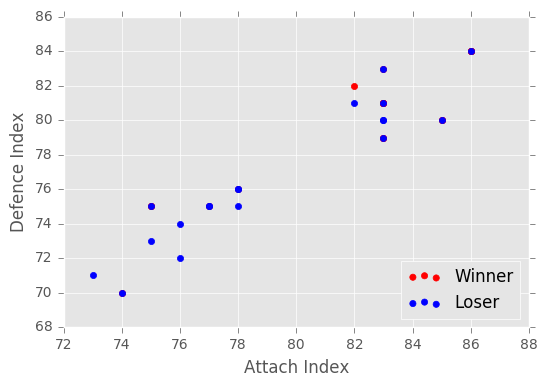

In [138]:
plt.scatter(winner_join['TeamInformation_Attack'],winner_join['TeamInformation_Defence'],color='red',label='Winner')
plt.scatter(loser_join['TeamInformation_Attack'],loser_join['TeamInformation_Defence'],color='blue',label='Loser')
plt.legend(loc = 'lower right')
plt.title('')
plt.xlabel('Attach Index')
plt.ylabel('Defence Index')
plt.show()

__Ranking__
1. Spain
2. Nertherlands
3. Spain
4. Uruguay

Quarter Final

In [166]:
squad_strength.sort_values(by=['TeamInformation_Attack'],ascending=False).head(10)

,Nation,TeamInformation_RivalTeam,TeamInformation_Attack,TeamInformation_Midfield,TeamInformation_Defence,BuildUpPlay_Speed,BuildUpPlay_Passing,BuildUpPlay_Positioning,ChanceCreation_Passing,ChanceCreation_Crossing,...,Defence_Pressure,Defence_Aggression,Defence_TeamWidth,Defence_DefenderLine,PlayerRoles_Captain,PlayerRoles_ShortFreeKick,PlayerRoles_LongFreeKick,PlayerRoles_Penalties,PlayerRoles_LeftCorner,PlayerRoles_RightCorner
22,Spain,Portugal,86,85,84,77,23,Free Form,50,37,...,61,46,67,Cover,Casillas,David Villa,Xavi,David Villa,Xavi,Xavi
4,Argentina,Brazil,85,81,80,57,32,Organised,70,41,...,41,43,56,Cover,Mascherano,Messi,Messi,Messi,Messi,Messi
14,Holland,Germany,85,82,76,35,35,Organised,70,35,...,45,60,35,Cover,van Bommel,Sneijder,Sneijder,van Persie,Sneijder,Robben
0,France,Italy,83,83,80,54,45,Organised,67,50,...,50,53,41,Cover,Mexes,Gourcuff,Gourcuff,Ribery,Gourcuff,Malouda
11,Germany,England,83,81,81,73,42,Organised,57,53,...,48,58,52,Cover,Lahm,Ozil,Schweinsteiger,Podolski,Ozil,Schweinsteiger
3,Uruguay,Argentina,83,74,79,51,41,Organised,65,54,...,30,58,45,Cover,Lugano,Forlan,Forlan,Forlan,Forlan,Forlan
7,England,Germany,83,85,83,39,57,Organised,62,48,...,47,49,55,Cover,Ferdinand,Gerrard,Lampard,Lampard,Lampard,Lampard
20,Portugal,Spain,82,78,81,65,30,Organised,69,70,...,35,42,61,Cover,Cristiano Ronaldo,Cristiano Ronaldo,Cristiano Ronaldo,Cristiano Ronaldo,Quaresma,Raul Meireles
18,Brazil,Argentina,82,81,82,53,30,Free Form,54,45,...,60,43,55,Cover,Lucio,Kaka,Ganso,Kaka,Andre Santos,Maicon
15,Italy,France,79,81,79,50,39,Free Form,65,66,...,34,55,50,Offside Trap,Buffon,Pirlo,Pirlo,Pirlo,Pirlo,Pirlo


In [167]:
squad_strength.sort_values(by=['TeamInformation_Defence'],ascending=False).head(10)

,Nation,TeamInformation_RivalTeam,TeamInformation_Attack,TeamInformation_Midfield,TeamInformation_Defence,BuildUpPlay_Speed,BuildUpPlay_Passing,BuildUpPlay_Positioning,ChanceCreation_Passing,ChanceCreation_Crossing,...,Defence_Pressure,Defence_Aggression,Defence_TeamWidth,Defence_DefenderLine,PlayerRoles_Captain,PlayerRoles_ShortFreeKick,PlayerRoles_LongFreeKick,PlayerRoles_Penalties,PlayerRoles_LeftCorner,PlayerRoles_RightCorner
22,Spain,Portugal,86,85,84,77,23,Free Form,50,37,...,61,46,67,Cover,Casillas,David Villa,Xavi,David Villa,Xavi,Xavi
7,England,Germany,83,85,83,39,57,Organised,62,48,...,47,49,55,Cover,Ferdinand,Gerrard,Lampard,Lampard,Lampard,Lampard
18,Brazil,Argentina,82,81,82,53,30,Free Form,54,45,...,60,43,55,Cover,Lucio,Kaka,Ganso,Kaka,Andre Santos,Maicon
20,Portugal,Spain,82,78,81,65,30,Organised,69,70,...,35,42,61,Cover,Cristiano Ronaldo,Cristiano Ronaldo,Cristiano Ronaldo,Cristiano Ronaldo,Quaresma,Raul Meireles
11,Germany,England,83,81,81,73,42,Organised,57,53,...,48,58,52,Cover,Lahm,Ozil,Schweinsteiger,Podolski,Ozil,Schweinsteiger
0,France,Italy,83,83,80,54,45,Organised,67,50,...,50,53,41,Cover,Mexes,Gourcuff,Gourcuff,Ribery,Gourcuff,Malouda
4,Argentina,Brazil,85,81,80,57,32,Organised,70,41,...,41,43,56,Cover,Mascherano,Messi,Messi,Messi,Messi,Messi
3,Uruguay,Argentina,83,74,79,51,41,Organised,65,54,...,30,58,45,Cover,Lugano,Forlan,Forlan,Forlan,Forlan,Forlan
15,Italy,France,79,81,79,50,39,Free Form,65,66,...,34,55,50,Offside Trap,Buffon,Pirlo,Pirlo,Pirlo,Pirlo,Pirlo
19,Cote d'Ivoire,Cameroon,76,78,77,70,72,Organised,69,65,...,60,75,35,Cover,Serey Die,Kessie,Kessie,Aurier,Gradel,Gradel


In [168]:
squad_strength.sort_values(by=['BuildUpPlay_Speed'],ascending=False).head(10)

,Nation,TeamInformation_RivalTeam,TeamInformation_Attack,TeamInformation_Midfield,TeamInformation_Defence,BuildUpPlay_Speed,BuildUpPlay_Passing,BuildUpPlay_Positioning,ChanceCreation_Passing,ChanceCreation_Crossing,...,Defence_Pressure,Defence_Aggression,Defence_TeamWidth,Defence_DefenderLine,PlayerRoles_Captain,PlayerRoles_ShortFreeKick,PlayerRoles_LongFreeKick,PlayerRoles_Penalties,PlayerRoles_LeftCorner,PlayerRoles_RightCorner
22,Spain,Portugal,86,85,84,77,23,Free Form,50,37,...,61,46,67,Cover,Casillas,David Villa,Xavi,David Villa,Xavi,Xavi
11,Germany,England,83,81,81,73,42,Organised,57,53,...,48,58,52,Cover,Lahm,Ozil,Schweinsteiger,Podolski,Ozil,Schweinsteiger
6,Korea Republic,China PR,76,71,67,72,54,Organised,53,28,...,44,50,38,Cover,Park,Park Chu Young,Lee Jung Soo,Park Chu Young,Ki,Ki
19,Cote d'Ivoire,Cameroon,76,78,77,70,72,Organised,69,65,...,60,75,35,Cover,Serey Die,Kessie,Kessie,Aurier,Gradel,Gradel
8,Slovenia,Croatia,73,71,71,67,57,Organised,56,62,...,49,62,47,Cover,Koren,Birsa,Novakovic,Novakovic,Birsa,Koren
13,Denmark,Sweden,75,73,75,66,42,Organised,68,71,...,50,57,63,Cover,Agger,Poulsen,Agger,Bendtner,Rommedahl,Rommedahl
20,Portugal,Spain,82,78,81,65,30,Organised,69,70,...,35,42,61,Cover,Cristiano Ronaldo,Cristiano Ronaldo,Cristiano Ronaldo,Cristiano Ronaldo,Quaresma,Raul Meireles
4,Argentina,Brazil,85,81,80,57,32,Organised,70,41,...,41,43,56,Cover,Mascherano,Messi,Messi,Messi,Messi,Messi
0,France,Italy,83,83,80,54,45,Organised,67,50,...,50,53,41,Cover,Mexes,Gourcuff,Gourcuff,Ribery,Gourcuff,Malouda
18,Brazil,Argentina,82,81,82,53,30,Free Form,54,45,...,60,43,55,Cover,Lucio,Kaka,Ganso,Kaka,Andre Santos,Maicon


#### FIFA WORLD CUP 2014

In [182]:
data_WC_14_ = data[(data['tournament'] == 'FIFA World Cup') & (data['date'].dt.year == 2014 )]
squad_strength_14 = pd.read_csv("web_crawler/squad/squad_strength/2014_FIFA_World_Cup_squad_strength.csv", encoding='utf-8')

In [148]:
data_WC_14_.shape

(57, 20)

In [149]:
list_nation_14 = squad_strength_14['Nation'].unique()
list_nation_14

array(['Brazil', 'Cameroon', 'Mexico', 'Australia', 'Chile', 'Netherlands',
       'Spain', 'Colombia', 'Greece', "Cote d'Ivoire", 'England', 'Italy',
       'Uruguay', 'Ecuador', 'France', 'Switzerland', 'Argentina',
       'Germany', 'Portugal', 'United States', 'Belgium', 'Russia',
       'Korea Republic'], dtype=object)

In [159]:
data_WC_14 = data_WC_14_[(data_WC_14_['team_1'].isin(list_nation)) & (data_WC_14_['team_2'].isin(list_nation))]
data_WC_14.head()

,id,date,team_1,team_2,home_team,tournament,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2,result
5040,35528,2014-06-13,Cameroon,Mexico,Mexico,FIFA World Cup,-1,0,15,22,10,12,3,5,3,0,3.7162,3.1323,2.1804,lose
5042,35527,2014-06-13,Australia,Chile,Chile,FIFA World Cup,-2,1,27,26,11,12,3,7,2,2,8.5756,4.3885,1.4170,lose
5048,35537,2014-06-16,Germany,Portugal,Germany,FIFA World Cup,6,5,16,18,15,12,6,6,4,3,2.0585,3.4904,3.6285,win
5051,35541,2014-06-17,Brazil,Mexico,Brazil,FIFA World Cup,12,6,19,20,14,12,9,5,0,0,1.3392,5.2419,9.0635,draw
5053,35546,2014-06-18,Chile,Spain,Spain,FIFA World Cup,-8,2,26,11,10,11,6,8,2,1,5.4804,4.4074,1.5674,win


In [160]:
print(data_WC_14.shape)

(15, 20)


In [151]:
win_result_14 = data_WC_14[data_WC_14['result'] == 'win']
lose_result_14 = data_WC_14[data_WC_14['result'] == 'lose']
draw_result_14 = data_WC_14[data_WC_14['result'] == 'draw']

winner_14 = pd.concat([win_result_14['team_1'], lose_result_14['team_2']]).to_frame('Nation')
loser_14 = pd.concat([lose_result_14['team_1'], win_result_14['team_2']]).to_frame('Nation')

# winner_14 = winner_14.to_frame('Nation')
# loser_14 = loser_14.to_frame('Nation')

winner_join_14 = pd.merge(winner_14,squad_strength,how='left', on='Nation')
loser_join_14 = pd.merge(loser_14,squad_strength,how='left', on='Nation')

In [152]:
feature_list_14 = loser_join_14.columns.tolist()
feature_list_14

['Nation',
 'TeamInformation_RivalTeam',
 'TeamInformation_Attack',
 'TeamInformation_Midfield',
 'TeamInformation_Defence',
 'BuildUpPlay_Speed',
 'BuildUpPlay_Passing',
 'BuildUpPlay_Positioning',
 'ChanceCreation_Passing',
 'ChanceCreation_Crossing',
 'ChanceCreation_Shooting',
 'ChanceCreation_Positioning',
 'Defence_Pressure',
 'Defence_Aggression',
 'Defence_TeamWidth',
 'Defence_DefenderLine',
 'PlayerRoles_Captain',
 'PlayerRoles_ShortFreeKick',
 'PlayerRoles_LongFreeKick',
 'PlayerRoles_Penalties',
 'PlayerRoles_LeftCorner',
 'PlayerRoles_RightCorner']

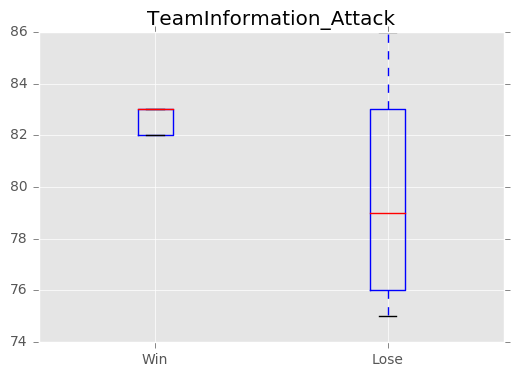

Ttest_indResult(statistic=1.62018517460197, pvalue=0.11825929201845174)


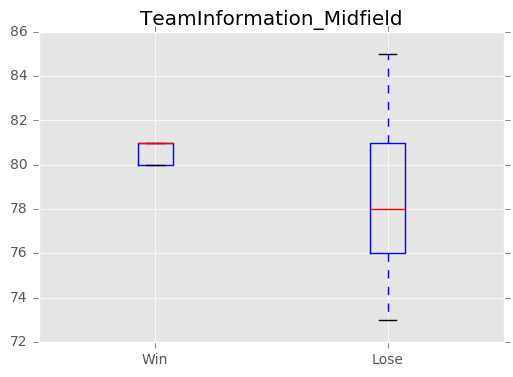

Ttest_indResult(statistic=0.65595646537110086, pvalue=0.51809188300239217)


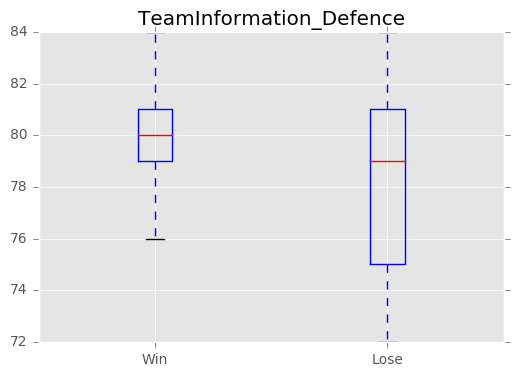

Ttest_indResult(statistic=1.1804087973706179, pvalue=0.2494050097073667)


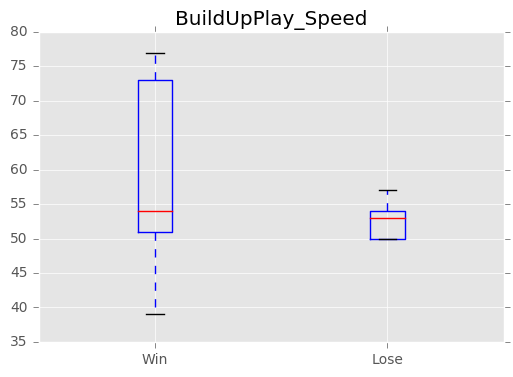

Ttest_indResult(statistic=1.1986946612309399, pvalue=0.24234926394222317)


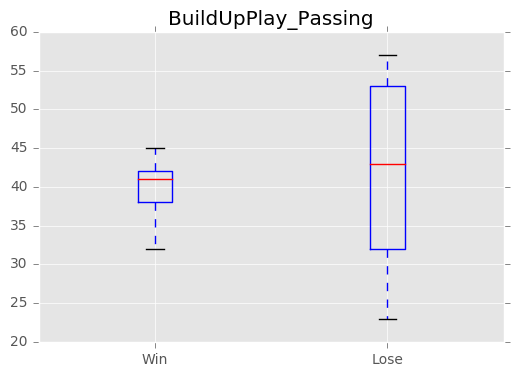

Ttest_indResult(statistic=-1.3067933487054746, pvalue=0.20366678526443677)
This is a category:  BuildUpPlay_Positioning


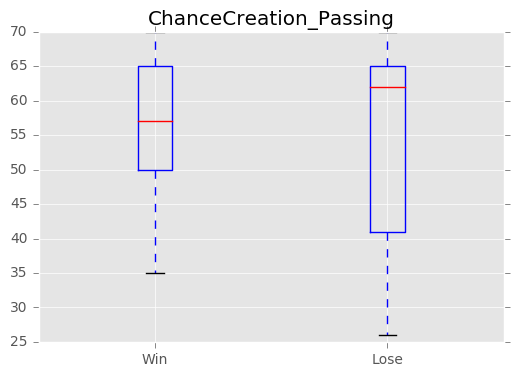

Ttest_indResult(statistic=0.12686126692218699, pvalue=0.9001070898762179)


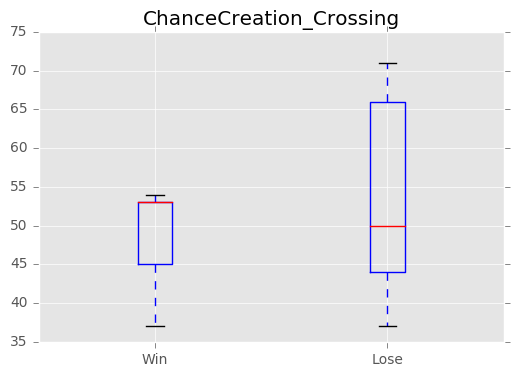

Ttest_indResult(statistic=-0.88639279324815701, pvalue=0.38420196534339202)


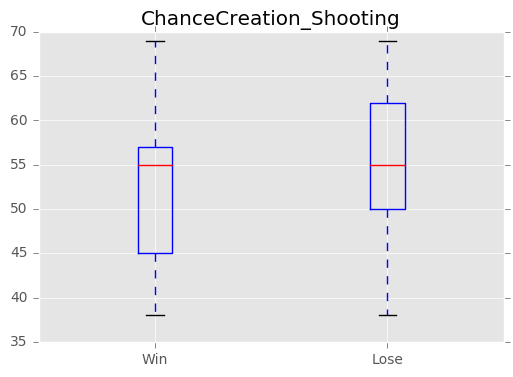

Ttest_indResult(statistic=-0.47647129665713667, pvalue=0.63804803043706904)
This is a category:  ChanceCreation_Positioning


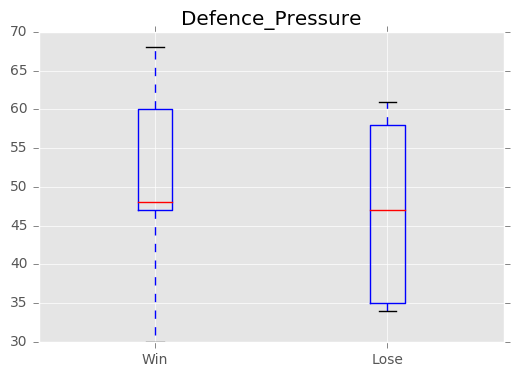

Ttest_indResult(statistic=0.71031843291447039, pvalue=0.4843523283994442)


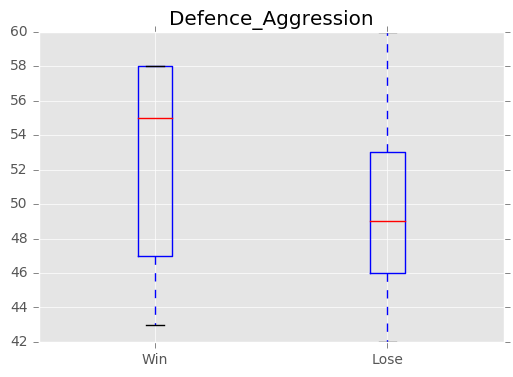

Ttest_indResult(statistic=1.3386974543190984, pvalue=0.19321292429856374)


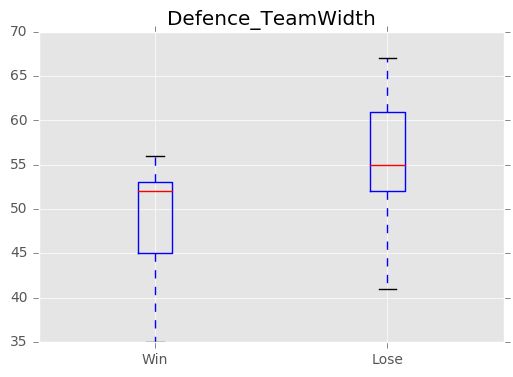

Ttest_indResult(statistic=-2.061957157779434, pvalue=0.050199229514782326)
This is a category:  Defence_DefenderLine


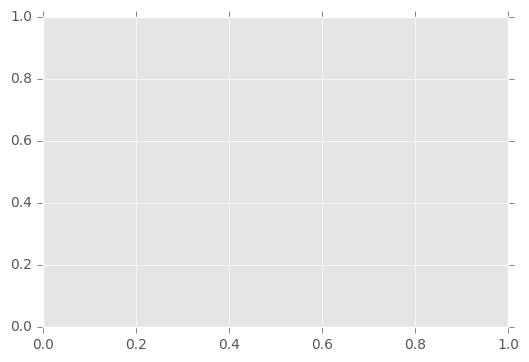

In [153]:
plt.style.use('ggplot')
plt.figure()
for feature_name in feature_list_14[2:16]:
    try:
        plt.boxplot([winner_join_14[feature_name],loser_join_14[feature_name]],labels=['Win','Lose'],showfliers=False)

        plt.title(feature_name)

        plt.show()
        
        print(ttest_ind(winner_join_14[feature_name],loser_join_14[feature_name]))
    except:
        print("This is a category: ",feature_name)

In [154]:
winner_join_14.head()

,Nation,TeamInformation_RivalTeam,TeamInformation_Attack,TeamInformation_Midfield,TeamInformation_Defence,BuildUpPlay_Speed,BuildUpPlay_Passing,BuildUpPlay_Positioning,ChanceCreation_Passing,ChanceCreation_Crossing,...,Defence_Pressure,Defence_Aggression,Defence_TeamWidth,Defence_DefenderLine,PlayerRoles_Captain,PlayerRoles_ShortFreeKick,PlayerRoles_LongFreeKick,PlayerRoles_Penalties,PlayerRoles_LeftCorner,PlayerRoles_RightCorner
0,Germany,England,83,81,81,73,42,Organised,57,53,...,48,58,52,Cover,Lahm,Ozil,Schweinsteiger,Podolski,Ozil,Schweinsteiger
1,Chile,Peru,77,80,75,40,38,Organised,35,45,...,68,55,35,Cover,Vidal,Sanchez,Vidal,Vidal,Sanchez,Sanchez
2,France,Italy,83,83,80,54,45,Organised,67,50,...,50,53,41,Cover,Mexes,Gourcuff,Gourcuff,Ribery,Gourcuff,Malouda
3,Brazil,Argentina,82,81,82,53,30,Free Form,54,45,...,60,43,55,Cover,Lucio,Kaka,Ganso,Kaka,Andre Santos,Maicon
4,Argentina,Brazil,85,81,80,57,32,Organised,70,41,...,41,43,56,Cover,Mascherano,Messi,Messi,Messi,Messi,Messi


In [156]:
loser_join_14.head()

,Nation,TeamInformation_RivalTeam,TeamInformation_Attack,TeamInformation_Midfield,TeamInformation_Defence,BuildUpPlay_Speed,BuildUpPlay_Passing,BuildUpPlay_Positioning,ChanceCreation_Passing,ChanceCreation_Crossing,...,Defence_Pressure,Defence_Aggression,Defence_TeamWidth,Defence_DefenderLine,PlayerRoles_Captain,PlayerRoles_ShortFreeKick,PlayerRoles_LongFreeKick,PlayerRoles_Penalties,PlayerRoles_LeftCorner,PlayerRoles_RightCorner
0,Cameroon,South Africa,78,78,75,53,43,Organised,63,44,...,58,48,65,Cover,Eto'o,Eto'o,Eto'o,Eto'o,Makoun,Geremi
1,Australia,New Zealand,76,73,72,38,57,Organised,26,71,...,34,60,52,Cover,Neill,Emerton,Emerton,Kewell,Emerton,Emerton
2,England,Germany,83,85,83,39,57,Organised,62,48,...,47,49,55,Cover,Ferdinand,Gerrard,Lampard,Lampard,Lampard,Lampard
3,Australia,New Zealand,76,73,72,38,57,Organised,26,71,...,34,60,52,Cover,Neill,Emerton,Emerton,Kewell,Emerton,Emerton
4,Italy,France,79,81,79,50,39,Free Form,65,66,...,34,55,50,Offside Trap,Buffon,Pirlo,Pirlo,Pirlo,Pirlo,Pirlo


In [183]:
squad_strength_14.sort_values(by=['TeamInformation_Attack'],ascending=False).head(10)

,Nation,TeamInformation_RivalTeam,TeamInformation_Attack,TeamInformation_Midfield,TeamInformation_Defence,BuildUpPlay_Speed,BuildUpPlay_Passing,BuildUpPlay_Positioning,ChanceCreation_Passing,ChanceCreation_Crossing,...,Defence_Pressure,Defence_Aggression,Defence_TeamWidth,Defence_DefenderLine,PlayerRoles_Captain,PlayerRoles_ShortFreeKick,PlayerRoles_LongFreeKick,PlayerRoles_Penalties,PlayerRoles_LeftCorner,PlayerRoles_RightCorner
6,Spain,Portugal,86,84,82,37,40,Organised,41,37,...,37,50,60,Cover,Casillas,Cesc Fabregas,Sergio Ramos,Diego Costa,David Silva,Cesc Fabregas
10,England,Germany,85,79,78,54,56,Organised,56,67,...,43,47,51,Cover,Rooney,Rooney,Baines,Rooney,Oxlade-Chamberlain,Oxlade-Chamberlain
16,Argentina,Brazil,85,82,79,32,39,Organised,41,36,...,60,55,50,Cover,Mascherano,Di Maria,Di Maria,Di Maria,Perez,Di Maria
5,Netherlands,Germany,84,76,75,57,45,Organised,55,52,...,48,50,52,Cover,van Persie,Robben,Sneijder,van Persie,Sneijder,Sneijder
0,Brazil,Argentina,83,81,83,62,48,Organised,57,42,...,61,37,42,Cover,Neymar,Neymar,David Luiz,Oscar,Oscar,Neymar
18,Portugal,Spain,82,79,80,55,31,Organised,30,52,...,47,47,63,Cover,Cristiano Ronaldo,Cristiano Ronaldo,Cristiano Ronaldo,Cristiano Ronaldo,Joao Moutinho,Miguel Veloso
17,Germany,England,82,84,78,67,37,Organised,52,46,...,50,57,51,Cover,Schweinsteiger,Reus,Reus,Muller,Reus,Reus
14,France,Italy,82,80,80,48,36,Organised,49,52,...,36,46,52,Cover,Lloris,Benzema,Valbuena,Benzema,Valbuena,Valbuena
12,Uruguay,Argentina,82,75,76,75,55,Organised,50,32,...,31,46,38,Cover,Lugano,Forlan,Forlan,Cavani,Forlan,Forlan
11,Italy,France,79,78,78,62,61,Organised,58,67,...,29,59,40,Cover,Buffon,Giaccherini,Bonucci,De Rossi,Giaccherini,Giaccherini


In [184]:
squad_strength_14.sort_values(by=['TeamInformation_Defence'],ascending=False).head(10)

,Nation,TeamInformation_RivalTeam,TeamInformation_Attack,TeamInformation_Midfield,TeamInformation_Defence,BuildUpPlay_Speed,BuildUpPlay_Passing,BuildUpPlay_Positioning,ChanceCreation_Passing,ChanceCreation_Crossing,...,Defence_Pressure,Defence_Aggression,Defence_TeamWidth,Defence_DefenderLine,PlayerRoles_Captain,PlayerRoles_ShortFreeKick,PlayerRoles_LongFreeKick,PlayerRoles_Penalties,PlayerRoles_LeftCorner,PlayerRoles_RightCorner
0,Brazil,Argentina,83,81,83,62,48,Organised,57,42,...,61,37,42,Cover,Neymar,Neymar,David Luiz,Oscar,Oscar,Neymar
6,Spain,Portugal,86,84,82,37,40,Organised,41,37,...,37,50,60,Cover,Casillas,Cesc Fabregas,Sergio Ramos,Diego Costa,David Silva,Cesc Fabregas
18,Portugal,Spain,82,79,80,55,31,Organised,30,52,...,47,47,63,Cover,Cristiano Ronaldo,Cristiano Ronaldo,Cristiano Ronaldo,Cristiano Ronaldo,Joao Moutinho,Miguel Veloso
14,France,Italy,82,80,80,48,36,Organised,49,52,...,36,46,52,Cover,Lloris,Benzema,Valbuena,Benzema,Valbuena,Valbuena
20,Belgium,Netherlands,75,81,79,30,36,Organised,56,37,...,48,42,48,Cover,Kompany,De Bruyne,De Bruyne,Hazard,De Bruyne,De Bruyne
16,Argentina,Brazil,85,82,79,32,39,Organised,41,36,...,60,55,50,Cover,Mascherano,Di Maria,Di Maria,Di Maria,Perez,Di Maria
10,England,Germany,85,79,78,54,56,Organised,56,67,...,43,47,51,Cover,Rooney,Rooney,Baines,Rooney,Oxlade-Chamberlain,Oxlade-Chamberlain
17,Germany,England,82,84,78,67,37,Organised,52,46,...,50,57,51,Cover,Schweinsteiger,Reus,Reus,Muller,Reus,Reus
11,Italy,France,79,78,78,62,61,Organised,58,67,...,29,59,40,Cover,Buffon,Giaccherini,Bonucci,De Rossi,Giaccherini,Giaccherini
15,Switzerland,Austria,74,76,77,48,52,Organised,48,51,...,47,45,52,Cover,Inler,Shaqiri,Rodriguez,Shaqiri,Shaqiri,Inler


### EURO 2012

In [176]:
data_ER_12_ = data[(data['tournament'] == 'UEFA Euro') & (data['date'].dt.year == 2012 )]
squad_strength_12 = pd.read_csv("web_crawler/squad/squad_strength/2012_UEFA_Euro_squads_strength.csv", encoding='utf-8')

In [61]:
squad_strength_12 = pd.read_csv("web_crawler/squad/squad_strength/2012_UEFA_Euro_squads_strength.csv", encoding='utf-8')

In [174]:
data_ER_12_.shape

(26, 20)

In [177]:
list_nation_12 = squad_strength_12['Nation'].unique()
list_nation_12

array(['Poland', 'Greece', 'Russia', 'Czech Republic', 'Netherlands',
       'Denmark', 'Germany', 'Portugal', 'Spain', 'Italy', 'Ireland',
       'Sweden', 'England', 'France'], dtype=object)

In [178]:
data_ER_12 = data_ER_12_[(data_ER_12_['team_1'].isin(list_nation)) & (data_ER_12_['team_2'].isin(list_nation))]
data_ER_12.head()

,id,date,team_1,team_2,home_team,tournament,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2,result
3724,33641,2012-06-09,Germany,Portugal,Germany,UEFA Euro,5,5,28,21,21,10,6,6,2,3,2.0963,3.2870,3.6989,win
3739,33662,2012-06-10,Italy,Spain,Spain,UEFA Euro,1,10,10,28,9,9,6,7,1,1,5.3057,3.3950,1.7568,draw
3751,33666,2012-06-11,England,France,France,UEFA Euro,7,5,10,13,14,8,6,6,3,4,3.2204,2.9789,2.4689,draw
3760,33683,2012-06-13,Denmark,Portugal,Denmark,UEFA Euro,-4,2,14,20,14,13,7,5,0,3,4.5436,3.4586,1.8346,lose
3781,33703,2012-06-17,Denmark,Germany,Denmark,UEFA Euro,-6,3,14,27,13,16,7,6,0,2,6.7937,3.9070,1.5400,lose


In [179]:
win_result_12 = data_ER_12[data_ER_12['result'] == 'win']
lose_result_12 = data_ER_12[data_ER_12['result'] == 'lose']
draw_result_12 = data_ER_12[data_ER_12['result'] == 'draw']

winner_12 = pd.concat([win_result_12['team_1'], lose_result_12['team_2']]).to_frame('Nation')
loser_12 = pd.concat([lose_result_12['team_1'], win_result_12['team_2']]).to_frame('Nation')

# winner_14 = winner_14.to_frame('Nation')
# loser_14 = loser_14.to_frame('Nation')

winner_join_12 = pd.merge(winner_12,squad_strength,how='left', on='Nation')
loser_join_12 = pd.merge(loser_12,squad_strength,how='left', on='Nation')

feature_list_12 = loser_join_12.columns.tolist()

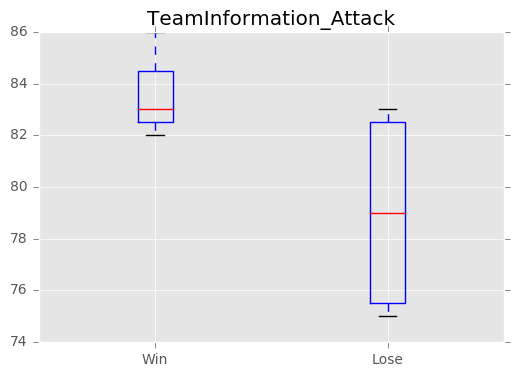

Ttest_indResult(statistic=2.4836876124986418, pvalue=0.028763033883085164)


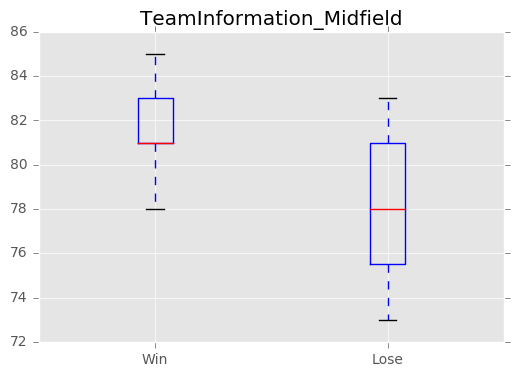

Ttest_indResult(statistic=2.0277677641345306, pvalue=0.065384936134576743)


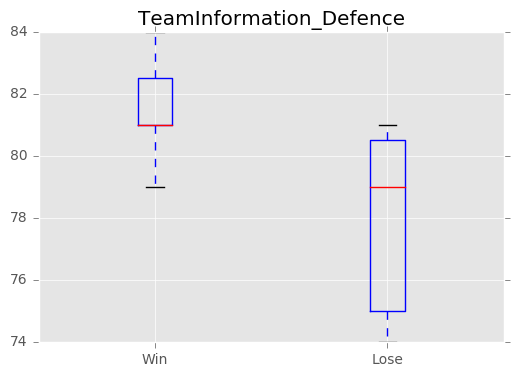

Ttest_indResult(statistic=2.750847901848529, pvalue=0.017574651620861012)


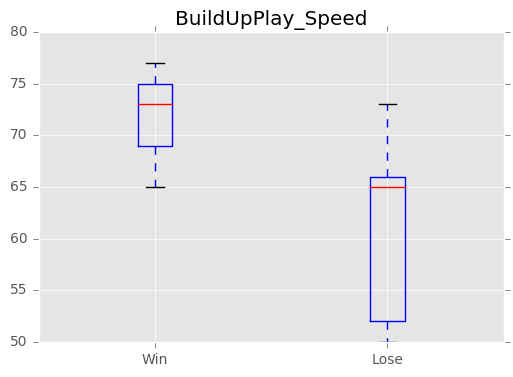

Ttest_indResult(statistic=1.7709781580707409, pvalue=0.1019370709421047)


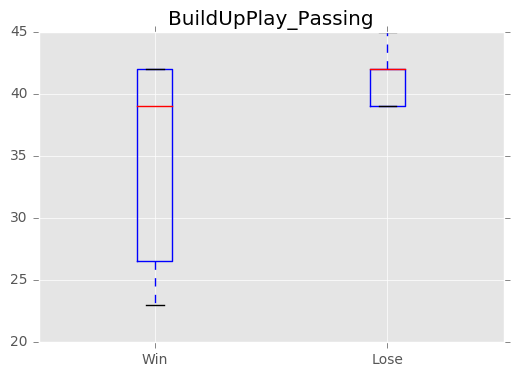

Ttest_indResult(statistic=-1.4214508039533758, pvalue=0.18065016016196858)
This is a category:  BuildUpPlay_Positioning


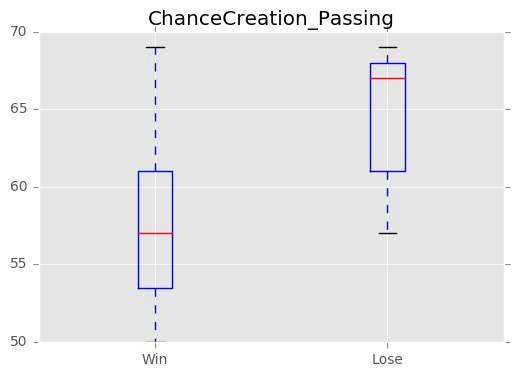

Ttest_indResult(statistic=-0.45562108082561004, pvalue=0.65679709549143706)


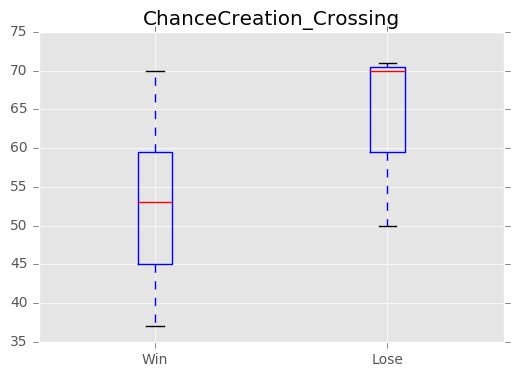

Ttest_indResult(statistic=-1.9874286713521447, pvalue=0.070184765500867247)


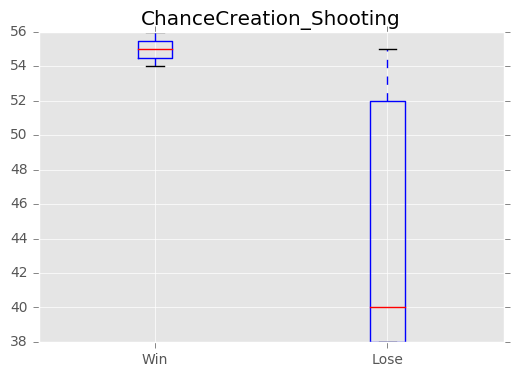

Ttest_indResult(statistic=3.1354944269133727, pvalue=0.0086036086979688134)
This is a category:  ChanceCreation_Positioning


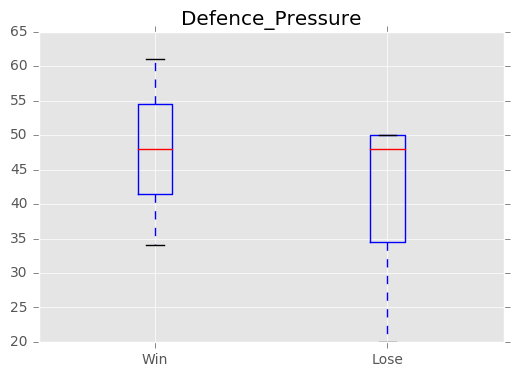

Ttest_indResult(statistic=1.1395244071571506, pvalue=0.27672034086352326)


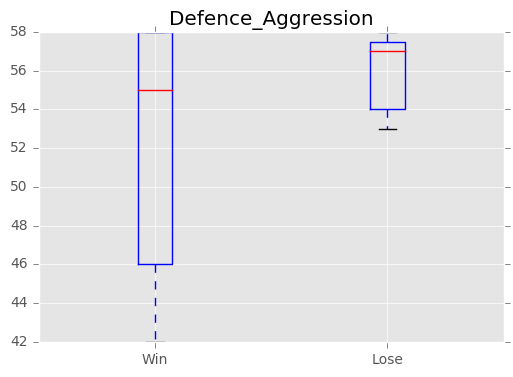

Ttest_indResult(statistic=-1.0170744045562476, pvalue=0.32918630923339176)


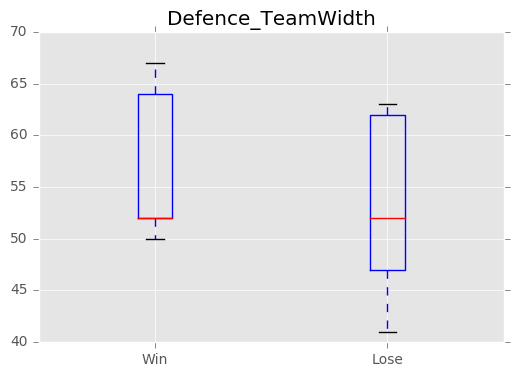

Ttest_indResult(statistic=0.86395392368607171, pvalue=0.40455180560886406)
This is a category:  Defence_DefenderLine


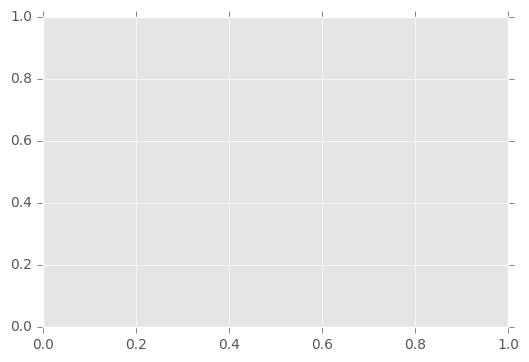

In [180]:
plt.style.use('ggplot')
plt.figure()
for feature_name in feature_list_12[2:16]:
    try:
        plt.boxplot([winner_join_12[feature_name],loser_join_12[feature_name]],labels=['Win','Lose'],showfliers=False)

        plt.title(feature_name)

        plt.show()
        
        print(ttest_ind(winner_join_12[feature_name],loser_join_12[feature_name]))
    except:
        print("This is a category: ",feature_name)

#### EURO 2016

In [14]:
data_ER_16_ = pd.read_csv("data/data_EURO_2016_result.csv", encoding='utf-8')
data_ER_16_.shape

(51, 22)

In [11]:
# data_ER_16_ = data[(data['tournament'] == 'UEFA Euro') & (data['date'].dt.year == 2016 )]
squad_strength_16 = pd.read_csv("web_crawler/squad/squad_strength/2016_UEFA_Euro_squads_strength.csv", encoding='utf-8')
squad_strength_16.head()

,Nation,TeamInformation_RivalTeam,TeamInformation_Attack,TeamInformation_Midfield,TeamInformation_Defence,BuildUpPlay_Speed,BuildUpPlay_Passing,BuildUpPlay_Positioning,ChanceCreation_Passing,ChanceCreation_Crossing,...,Defence_Pressure,Defence_Aggression,Defence_TeamWidth,Defence_DefenderLine,PlayerRoles_Captain,PlayerRoles_ShortFreeKick,PlayerRoles_LongFreeKick,PlayerRoles_Penalties,PlayerRoles_LeftCorner,PlayerRoles_RightCorner
0,France,Italy,82,82,80,48,36,Organised,49,52,...,36,46,52,Cover,Lloris,Griezmann,Payet,Giroud,Payet,Payet
1,Romania,Hungary,71,72,73,55,50,Organised,40,65,...,35,45,50,Cover,Chiriches,Sanmartean,Sanmartean,Stancu,Torje,Torje
2,Switzerland,Austria,76,77,78,62,52,Organised,59,59,...,51,45,52,Cover,Lichtsteiner,Rodriguez,Rodriguez,Rodriguez,Shaqiri,Rodriguez
3,Russia,Poland,78,76,77,65,53,Organised,62,61,...,47,47,55,Offside Trap,Shirokov,Shirokov,Ignashevich,Shirokov,Shatov,Mamaev
4,Wales,England,74,74,73,60,44,Organised,53,46,...,48,53,63,Cover,Williams,Bale,Ramsey,Bale,Ramsey,Ramsey


In [5]:
list_nation_16 = squad_strength_16['Nation'].unique()
list_nation_16

array(['France', 'Romania', 'Switzerland', 'Russia', 'Wales', 'Germany',
       'Poland', 'Northern Ireland', 'Spain', 'Czech Republic', 'Turkey',
       'Belgium', 'Italy', 'Ireland', 'Sweden', 'Portugal', 'Iceland',
       'Austria', 'Hungary'], dtype=object)

In [15]:
data_ER_16 = data_ER_16_[(data_ER_16_['team_1'].isin(list_nation_16)) & (data_ER_16_['team_2'].isin(list_nation_16))]
data_ER_16.shape

(34, 22)

In [17]:
win_result_16 = data_ER_16[data_ER_16['result'] == 'win']
lose_result_16 = data_ER_16[data_ER_16['result'] == 'lose']
draw_result_16 = data_ER_16[data_ER_16['result'] == 'draw']

winner_16 = pd.concat([win_result_16['team_1'], lose_result_16['team_2']]).to_frame('Nation')
loser_16 = pd.concat([lose_result_16['team_1'], win_result_16['team_2']]).to_frame('Nation')

# winner_14 = winner_14.to_frame('Nation')
# loser_14 = loser_14.to_frame('Nation')

winner_join_16 = pd.merge(winner_16,squad_strength_16,how='left', on='Nation')
loser_join_16 = pd.merge(loser_16,squad_strength_16,how='left', on='Nation')

feature_list_16 = loser_join_16.columns.tolist()

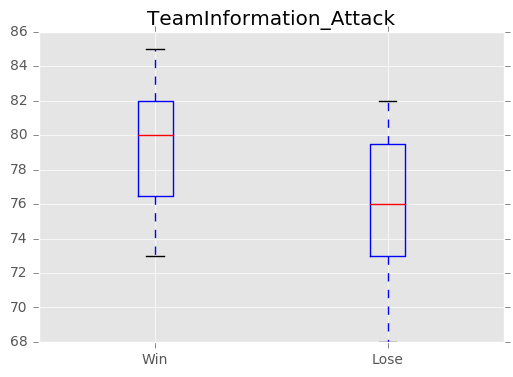

Ttest_indResult(statistic=3.0302427622244452, pvalue=0.0040821332626417928)


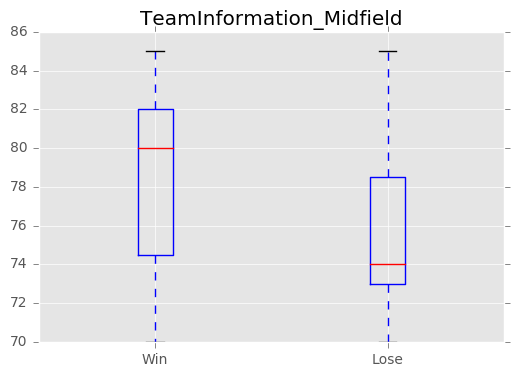

Ttest_indResult(statistic=2.5122499541955241, pvalue=0.015737556426446121)


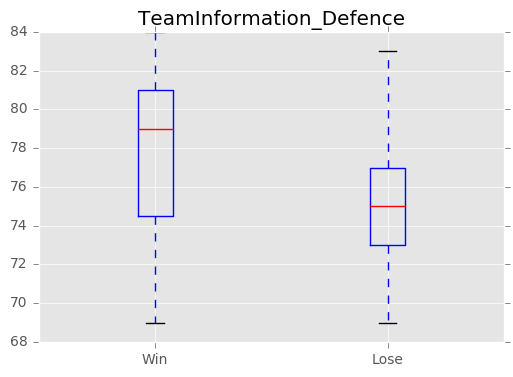

Ttest_indResult(statistic=2.284695478652734, pvalue=0.027208982523045031)


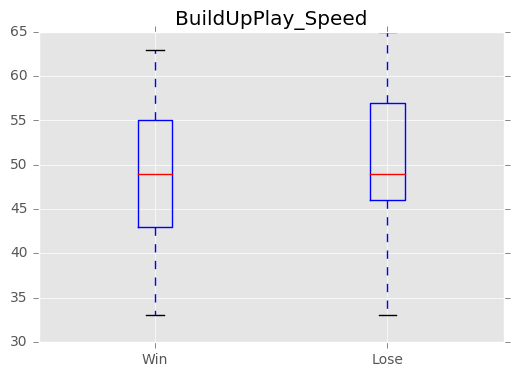

Ttest_indResult(statistic=-0.71721928330283702, pvalue=0.47702923704331035)


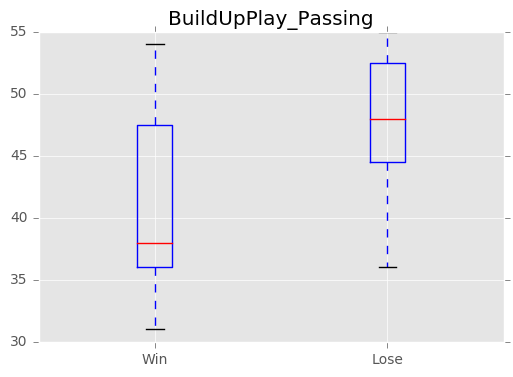

Ttest_indResult(statistic=-2.5804839929352932, pvalue=0.013279564333144275)
This is a category:  BuildUpPlay_Positioning


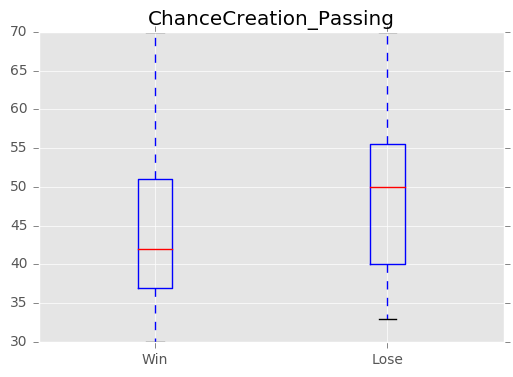

Ttest_indResult(statistic=-1.1233317083134602, pvalue=0.26738856064815064)


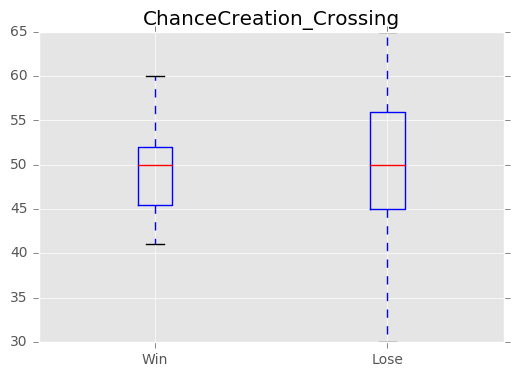

Ttest_indResult(statistic=-0.27926435044698772, pvalue=0.78135047625976684)


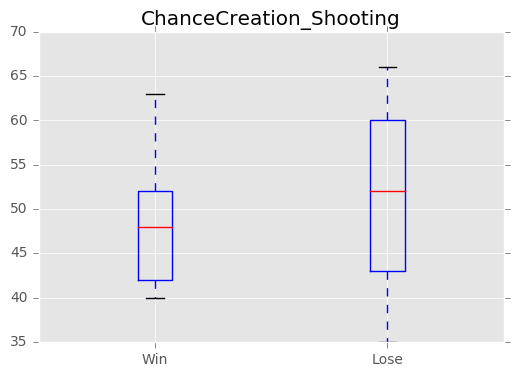

Ttest_indResult(statistic=-1.1084935660544317, pvalue=0.27367122563720936)
This is a category:  ChanceCreation_Positioning


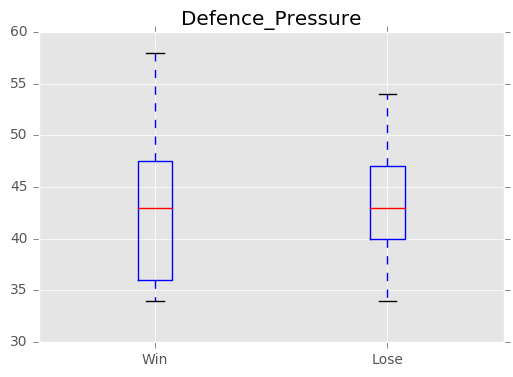

Ttest_indResult(statistic=-0.6007431967583502, pvalue=0.55109323596974469)


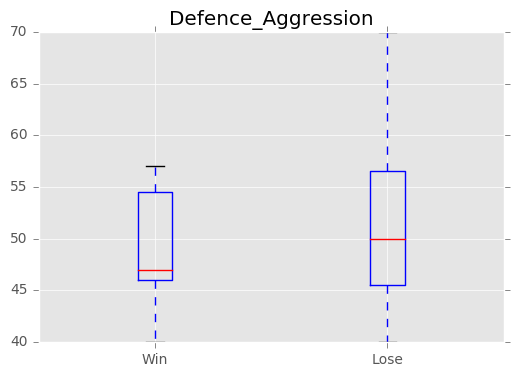

Ttest_indResult(statistic=-0.59090895893566686, pvalue=0.55760483216834666)


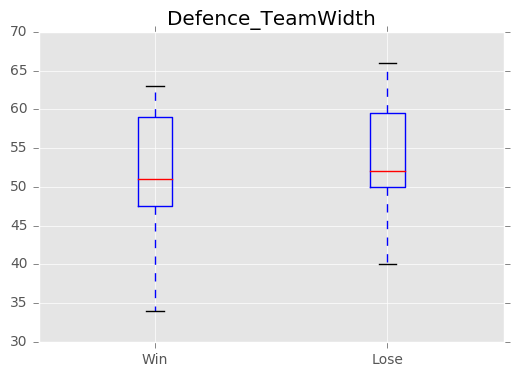

Ttest_indResult(statistic=-0.67930546571446315, pvalue=0.50050243150824558)
This is a category:  Defence_DefenderLine


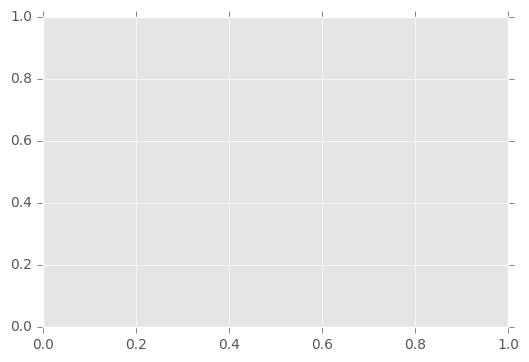

In [18]:
plt.style.use('ggplot')
plt.figure()
for feature_name in feature_list_16[2:16]:
    try:
        plt.boxplot([winner_join_16[feature_name],loser_join_16[feature_name]],labels=['Win','Lose'],showfliers=False)

        plt.title(feature_name)

        plt.show()
        
        print(ttest_ind(winner_join_16[feature_name],loser_join_16[feature_name]))
    except:
        print("This is a category: ",feature_name)

In [2]:
# Load library
import csv
import pandas as pd
import numpy as np
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import datetime as dt

In [42]:
# Read the current data
data = pd.read_csv("data/data_2005.csv", encoding='utf-8')
data.head()

,Unnamed: 0,id,date,team_1,team_2,home_team,tournament,h_win_diff,h_draw,f_goalF_1,...,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2,result
0,26944,26944,1/2/2005,Burma,Singapore,Singapore,AFF Championship,5,2,19,...,7,10,4,4,2,3,NaN,NaN,NaN,lose
1,26945,26945,1/3/2005,Indonesia,Malaysia,Malaysia,AFF Championship,8,11,24,...,16,11,4,5,2,0,NaN,NaN,NaN,win
2,26946,26946,1/8/2005,Egypt,Uganda,Egypt,Friendly,6,1,17,...,13,7,5,1,2,2,NaN,NaN,NaN,win
3,26947,26947,1/8/2005,Indonesia,Singapore,Indonesia,AFF Championship,8,7,20,...,18,12,4,5,2,3,NaN,NaN,NaN,lose
4,26948,26948,1/8/2005,French Guyana,Jamaica,Jamaica,CFU Caribbean Cup qualification,0,0,12,...,10,22,2,4,3,5,NaN,NaN,NaN,lose


In [ ]:
# Is there any difference between "form" of winning team and lose team
# How many time a bad-form team won a good-form team?
# What is a good-form / bad-form team?
# Is playing as "Home Team" better than playing as "Away Team"?
# Is ratio-odd usually right? How much are they likely to be correct?

In [3]:
# Is playing as "Home Team" better than playing as "Away Team"?
# find pair team_1 = home_team -> win, team_1 ~= home_team -> lose
home1 = data[(data.team_1 == data.home_team) & (data.result == 'win')]
home2 = data[(data.team_1 != data.home_team) & (data.result == 'lose')]


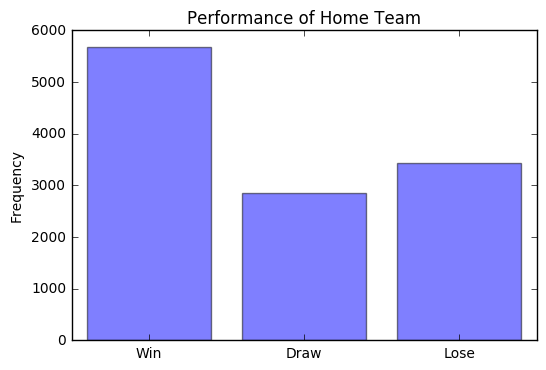

In [5]:

win = home1.shape[0] + home2.shape[0]
draw = data[data.result == 'draw'].shape[0]
lose = data.shape[0] - win - draw

objects = ('Win', 'Draw', 'Lose')
y_pos = np.arange(len(objects))
performance = [win,draw,lose]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('Performance of Home Team')
 
plt.show()

<a id ='section1'></a> AAAAA

In [4]:
# Consider history
win_result = data[data['result'] == 'win']
lose_result = data[data['result'] == 'lose']
draw_result = data[data['result'] == 'draw']

win_diff_win = pd.concat([win_result['h_win_diff'], -lose_result['h_win_diff']])
lose_diff_win = pd.concat([lose_result['h_win_diff'], -win_result['h_win_diff']])
draw_diff_win = draw_result['h_win_diff']

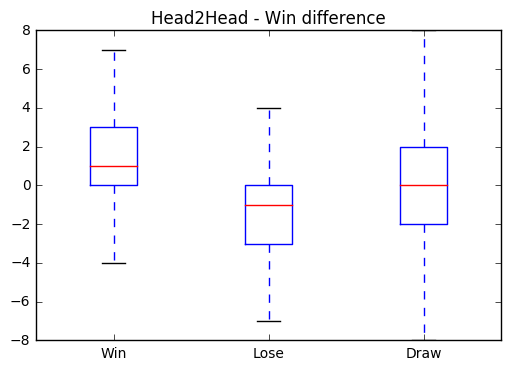

In [86]:
plt.figure()
plt.boxplot([win_diff_win,lose_diff_win,draw_diff_win],labels=['Win','Lose','Draw'],showfliers=False)

plt.title('Head2Head - Win difference')

plt.show()

In [9]:
ttest_ind(win_diff_win,lose_diff_win)

Ttest_indResult(statistic=35.432781367462361, pvalue=5.3865361955241691e-266)

In [7]:
# Is there any difference between "form" of winning team and lose team
# How many time a bad-form team won a good-form team?
# What is a good-form / bad-form team?

# fig, axes = plt.subplots(2, 4)
win_goalF  = pd.concat([win_result['f_goalF_1'], lose_result['f_goalF_2']])
lose_goalF = pd.concat([lose_result['f_goalF_1'], win_result['f_goalF_2']])
draw_goalF = pd.concat([draw_result['f_goalF_1'],draw_result['f_goalF_2']])

win_goalA  = pd.concat([win_result['f_goalA_1'], lose_result['f_goalA_2']])
lose_goalA = pd.concat([lose_result['f_goalA_1'], win_result['f_goalA_2']])
draw_goalA = pd.concat([draw_result['f_goalA_1'],draw_result['f_goalA_2']])

win_win  = pd.concat([win_result['f_win_1'], lose_result['f_win_2']])
lose_win = pd.concat([lose_result['f_win_1'], win_result['f_win_2']])
draw_win = pd.concat([draw_result['f_win_1'], draw_result['f_win_2']])

win_draw  = pd.concat([win_result['f_draw_1'], lose_result['f_draw_2']])
lose_draw = pd.concat([win_result['f_draw_1'], lose_result['f_draw_2']])
draw_draw = pd.concat([draw_result['f_draw_1'], draw_result['f_draw_2']])

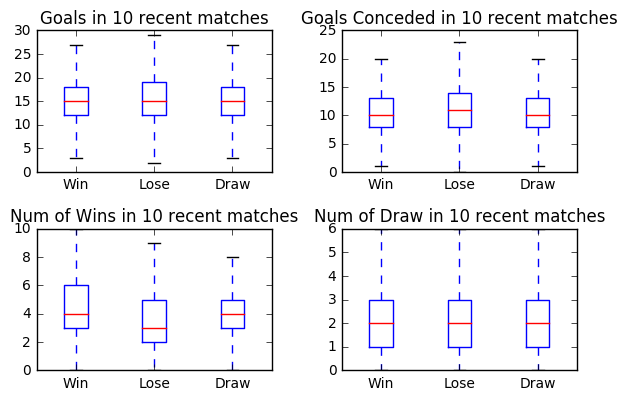

In [8]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
# Goals
axs[0,0].boxplot([win_goalF,lose_goalF,draw_goalF],labels=['Win','Lose','Draw'],showfliers=False)
axs[0,0].set_title('Goals in 10 recent matches')

# Goals Conceded
axs[0,1].boxplot([win_goalA,lose_goalA,draw_goalA],labels=['Win','Lose','Draw'],showfliers=False)
axs[0,1].set_title('Goals Conceded in 10 recent matches')

# Wins
axs[1,0].boxplot([win_win,lose_win,draw_win],labels=['Win','Lose','Draw'],showfliers=False)
axs[1,0].set_title('Num of Wins in 10 recent matches')

# Draw
axs[1,1].boxplot([win_draw,lose_draw,draw_draw],labels=['Win','Lose','Draw'],showfliers=False)
axs[1,1].set_title('Num of Draw in 10 recent matches')

plt.show()

In [10]:
# t-test of number of win
ttest_ind(win_win,lose_win)

Ttest_indResult(statistic=29.488698758378064, pvalue=9.6646508941629036e-187)

In [6]:
# Is ratio-odd usually right? How much are they likely to be correct?

# Read the current data
data_odd = pd.read_csv("data/data_odd_match.csv", encoding='utf-8')
# data_2005.head()


In [8]:
data_odd.head()

,Unnamed: 0,match_id,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win
0,452,171108,France: Ligue 1,2005-01-15,Monaco,5,Caen,2,1.398,3.7540,7.5690,1.44,4.2,9.75,Paddy Power,Pinnacle Sports,Expekt,10,10,10
1,693,171787,France: Ligue 1,2005-01-22,Monaco,2,Lens,0,1.471,3.3650,7.2750,1.53,3.6,9.00,Sportingbet,bet365,Expekt,10,10,10
2,1067,172612,France: Ligue 1,2005-01-30,Monaco,2,Paris SG,0,1.790,3.0300,4.4830,1.83,3.1,5.30,William Hill,BetVictor,Expekt,10,10,10
3,1481,173514,World: Friendly International,2005-02-08,Latvia,1,Finland,2,2.800,3.1929,2.2343,2.88,3.2,2.35,Sportingbet,bet-at-home,Expekt,7,7,7
4,1487,173539,World: World Cup,2005-02-09,Japan,2,North Korea,1,1.318,4.1900,8.6980,1.35,5.0,9.99,bet-at-home,bet365,BetVictor,5,5,5


In [7]:
# get average odd of win team, lose team
home_win = data_odd[data_odd.home_score > data_odd.away_score]
away_win = data_odd[data_odd.home_score < data_odd.away_score]
draw = data_odd[data_odd.home_score == data_odd.away_score]

In [9]:
# home_win_avg_odd = home_win['avg_odds_home_win']
win_avg_odd = pd.concat([home_win['avg_odds_home_win'],away_win['avg_odds_away_win']])
lose_avg_odd = pd.concat([home_win['avg_odds_away_win'],away_win['avg_odds_home_win']])
draw_avg_odd = draw['avg_odds_draw']

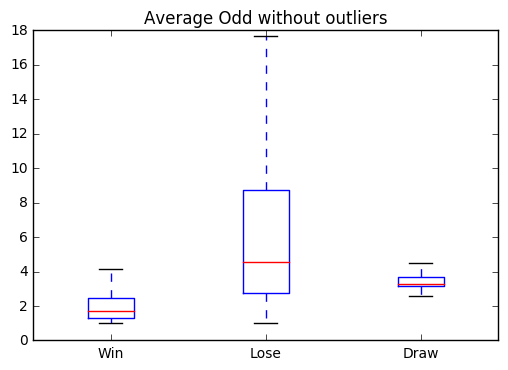

In [10]:
plt.figure()
plt.boxplot([win_avg_odd,lose_avg_odd,draw_avg_odd],labels=['Win','Lose','Draw'],showfliers=False)
plt.title('Average Odd without outliers')
plt.show()

In [79]:
stats.ttest_ind(win_avg_odd.values,lose_avg_odd.values)

Ttest_indResult(statistic=-43.22461132125629, pvalue=0.0)

In [72]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
type(rvs1)

numpy.ndarray

In [74]:
type(win_avg_odd.as_matrix)

method

In [76]:
from scipy.stats import ttest_ind
ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=-0.59224258066284774, pvalue=0.55382230830811707)

In [75]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=-0.59224258066284774, pvalue=0.55382230830811707)

In [77]:
from scipy import stats
stats.ttest_ind([1,2,3,4,5],[10,11,12,13,15], equal_var = False)
# (0.26833823296239279, 0.78849452749500748)

Ttest_indResult(statistic=-8.261843893231644, pvalue=4.2860932429809816e-05)

In [78]:
type(win_avg_odd.values)

numpy.ndarray

In [2]:
# PCA to visualize data
from sklearn.decomposition import PCA

In [19]:
# Load data from 2005-2015 with odd
data = pd.read_csv("data/data_odd_2005.csv", encoding='utf-8')
data = data.iloc[:,2:]
data.head()

,team_1,team_2,home_team,tournament,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2,result
0,Finland,Latvia,Latvia,Cyprus International Tournament,3,2,16,17,12,18,5,2,0,2,2.2343,3.1929,2.8000,win
1,Japan,North Korea,Japan,FIFA World Cup qualification,0,3,11,17,18,11,6,3,2,3,1.3180,4.1900,8.6980,win
2,Saudi Arabia,Uzbekistan,Uzbekistan,FIFA World Cup qualification,0,0,17,15,9,12,6,6,2,2,3.1000,3.2000,2.0467,draw
3,Bahrain,Iran,Bahrain,FIFA World Cup qualification,0,1,20,20,12,16,3,6,4,3,2.4629,3.1786,2.5429,draw
4,Denmark,Greece,Greece,FIFA World Cup qualification,5,3,11,8,17,8,3,4,5,4,3.0778,3.0667,2.1478,lose


In [3]:
# Load data from 2005-2015 with odd
data = pd.read_csv("data/data_odd_2005_regression_syn.csv", encoding='utf-8')
data = data.iloc[:,2:]
data.head()

,team_1,team_2,home_team,tournament,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2,result,goal_diff
0,Finland,Latvia,Latvia,Cyprus International Tournament,3,2,16,17,12,18,5,2,0,2,2.2343,3.1929,2.8000,win,1.0
1,Japan,North Korea,Japan,FIFA World Cup qualification,0,3,11,17,18,11,6,3,2,3,1.3180,4.1900,8.6980,win,1.0
2,Saudi Arabia,Uzbekistan,Uzbekistan,FIFA World Cup qualification,0,0,17,15,9,12,6,6,2,2,3.1000,3.2000,2.0467,draw,0.0
3,Bahrain,Iran,Bahrain,FIFA World Cup qualification,0,1,20,20,12,16,3,6,4,3,2.4629,3.1786,2.5429,draw,0.0
4,Denmark,Greece,Greece,FIFA World Cup qualification,5,3,11,8,17,8,3,4,5,4,3.0778,3.0667,2.1478,lose,-1.0


In [5]:
from LE import saveLabelEncoder,loadLabelEncoder
le_result = loadLabelEncoder('LE/result.npy')
data['result'] = le_result.transform(data['result'])

# Add HOME team
same_ht = data.team_1 == data.home_team
data.loc[same_ht,'home_team'] = 1
data.loc[-same_ht,'home_team'] = 0

col = list(range(4,18))
col.insert(0,2)
data = data.iloc[:,col]

In [8]:
data.head()

,home_team,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2,result
0,0,0.502780,-0.127565,0.186382,0.393345,0.322463,1.809775,0.524849,-1.009448,-1.704240,-0.294809,-0.380242,-0.508356,-0.289386,2
1,1,0.000000,0.124099,-0.848432,0.393345,1.809775,0.074577,1.036281,-0.498016,-0.294809,0.409907,-0.527407,-0.059384,0.657881,2
2,0,0.000000,-0.630893,0.393345,-0.020581,-0.421194,0.322463,1.036281,1.036281,-0.294809,-0.294809,-0.241203,-0.505159,-0.410372,0
3,1,0.000000,-0.379229,1.014234,1.014234,0.322463,1.314005,-0.498016,1.036281,1.114623,0.409907,-0.343527,-0.514795,-0.330678,0
4,0,0.837967,0.124099,-0.848432,-1.469321,1.561890,-0.669079,-0.498016,0.013417,1.819339,1.114623,-0.244769,-0.565181,-0.394135,1


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.iloc[:,1:14] = scaler.fit_transform(data.iloc[:,1:14])

In [12]:
# data_ = data.iloc[:,6:].copy()
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [13]:
x.head()

,home_team,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2
0,0,0.502780,-0.127565,0.186382,0.393345,0.322463,1.809775,0.524849,-1.009448,-1.704240,-0.294809,-0.380242,-0.508356,-0.289386
1,1,0.000000,0.124099,-0.848432,0.393345,1.809775,0.074577,1.036281,-0.498016,-0.294809,0.409907,-0.527407,-0.059384,0.657881
2,0,0.000000,-0.630893,0.393345,-0.020581,-0.421194,0.322463,1.036281,1.036281,-0.294809,-0.294809,-0.241203,-0.505159,-0.410372
3,1,0.000000,-0.379229,1.014234,1.014234,0.322463,1.314005,-0.498016,1.036281,1.114623,0.409907,-0.343527,-0.514795,-0.330678
4,0,0.837967,0.124099,-0.848432,-1.469321,1.561890,-0.669079,-0.498016,0.013417,1.819339,1.114623,-0.244769,-0.565181,-0.394135


In [124]:
# Normalize data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x)
# x = scaler.transform(x)

In [14]:
import pickle
pca = PCA(n_components=2).fit(x)
# Save the best model
filename = 'save_model/PCA.sav'
pickle.dump(pca, open(filename, 'wb'))

In [15]:
# load the model from disk
pca_loaded_model = pickle.load(open(filename, 'rb'))
X_reduced = pca_loaded_model.transform(x)

In [35]:
# Load Data EURO 2016
data_2016 = pd.read_csv("data/data_EURO_2016.csv", encoding='utf-8')
data_2016 = data_2016.iloc[:,3:]

# Load Label Encoder
le_result = loadLabelEncoder('LE/result.npy')
data_2016['result'] = le_result.transform(data_2016['result'])

# le_tour = loadLabelEncoder('LE/tournament.npy')
# data['tournament'] = le_tour.transform(data['tournament'])

# le_country = loadLabelEncoder('LE/country.npy')
# data['team_1'] = le_country.transform(data['team_1'])
# data['team_2'] = le_country.transform(data['team_2'])
# data['home_team'] = le_country.transform(data['home_team'])

# Add HOME team
same_ht = data_2016.team_1 == data_2016.home_team
data_2016.loc[same_ht,'home_team'] = 1
data_2016.loc[-same_ht,'home_team'] = 0

col = list(range(4,18))
col.insert(0,2)
data_2016 = data_2016.iloc[:,col]

# Standard Scale
scaler = StandardScaler()
data_2016.iloc[:,1:14] = scaler.fit_transform(data_2016.iloc[:,1:14])

data_x = data_2016.iloc[:,:-1]
data_y = data_2016.iloc[:,-1]

In [36]:
data_2016.head()

,home_team,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_t1_win,avg_odds_draw,avg_odds_t2_win,result
0,1,0.422928,0.124079,0.968756,-1.822830,-0.203357,0.329099,1.269961,-2.055767,-1.195915,3.173979,-0.755620,2.020251,2.453167,2
1,1,-0.624126,-0.579035,-1.708446,0.659228,0.594428,1.109752,-1.245301,-0.077576,0.792944,-1.413513,0.694369,-0.440820,-0.915053,1
2,1,0.108811,-0.051700,-0.491536,-0.243339,1.126284,2.280731,1.269961,0.581821,-1.195915,-1.413513,-0.598314,0.042335,0.388177,0
3,0,-0.100599,-0.754813,-0.248154,-1.597189,0.594428,-0.841881,-0.616486,-0.736973,0.792944,0.552555,-0.240240,-0.878679,-0.471933,1
4,1,0.108811,-0.227478,0.238610,-0.468981,2.455925,-0.451554,-0.616486,1.241218,-1.195915,-0.102801,-0.693698,1.204927,1.059571,2


In [39]:
X_reduced = pca_loaded_model.transform(data_x)
y = data_y

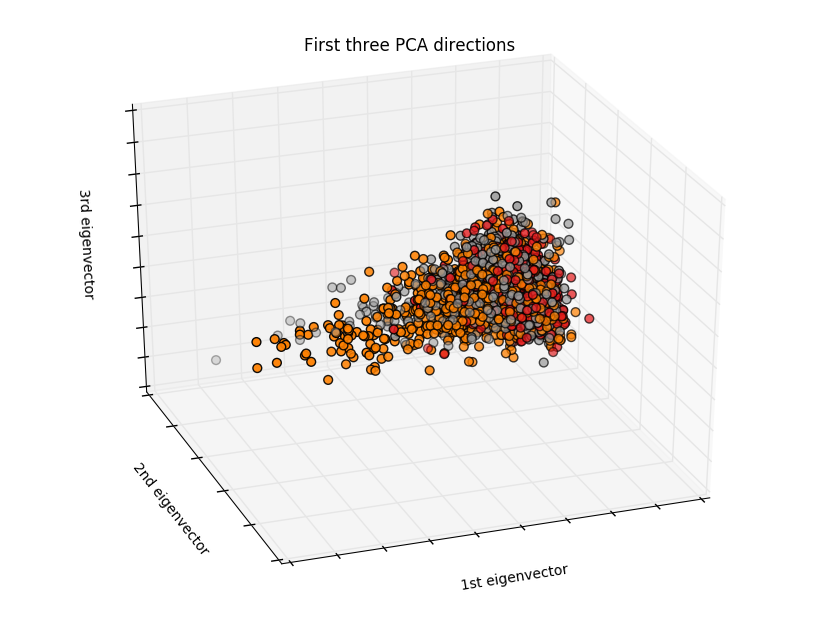

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(x)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

([], <a list of 0 Text yticklabel objects>)

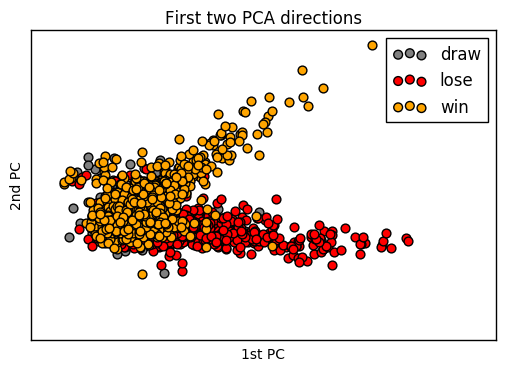

In [131]:

# plt.figure(2, figsize=(8, 6))
plt.clf()
fig, ax = plt.subplots()
# Plot the training points
labels = ['draw','lose','win']
colors = ['gray','red','orange']
for i in range(3):   
    ax.scatter(X_reduced[y==i, 0], X_reduced[y==i, 1], c=colors[i],label = labels[i],cmap=plt.cm.Set1,s=40,
                edgecolor='k')


plt.title("First two PCA directions")
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
ax.legend()
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())



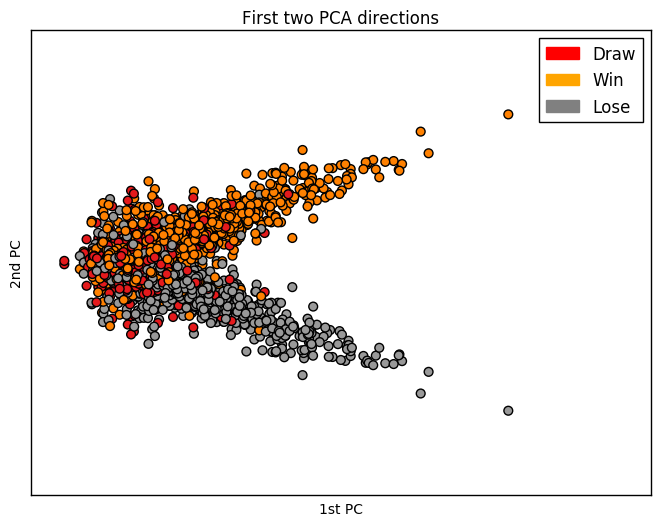

In [16]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1,s=40,
            edgecolor='k')

plt.title("First two PCA directions")
plt.xlabel("1st PC")
plt.ylabel("2nd PC")

plt.xticks(())
plt.yticks(())

# I Need a legend here
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Draw')
orange_patch = mpatches.Patch(color='orange', label='Win')
gray_patch = mpatches.Patch(color='gray', label='Lose')
plt.legend(handles=[red_patch,orange_patch,gray_patch])
plt.show()


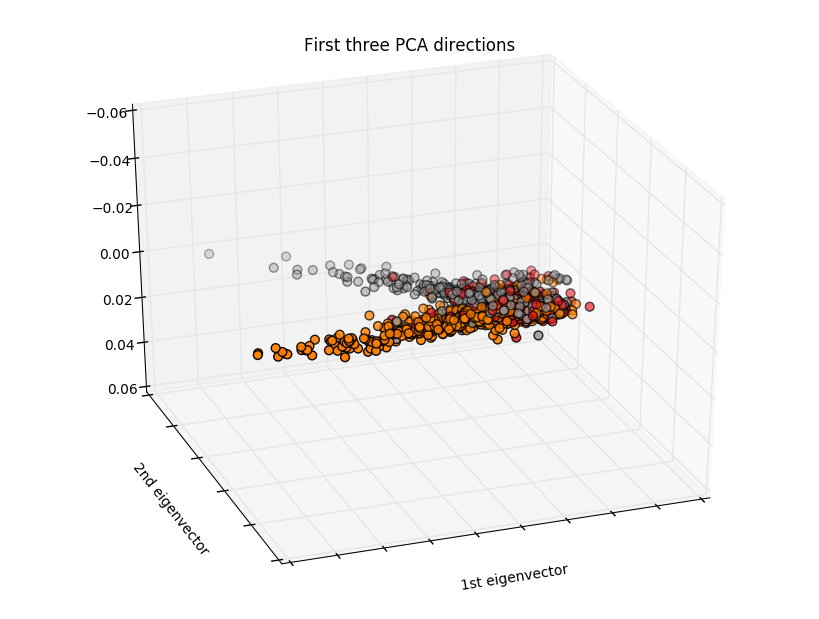

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=2).fit_transform(x)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

plt.show()

In [83]:
win_avg_odd.mean()

2.2082655470438031

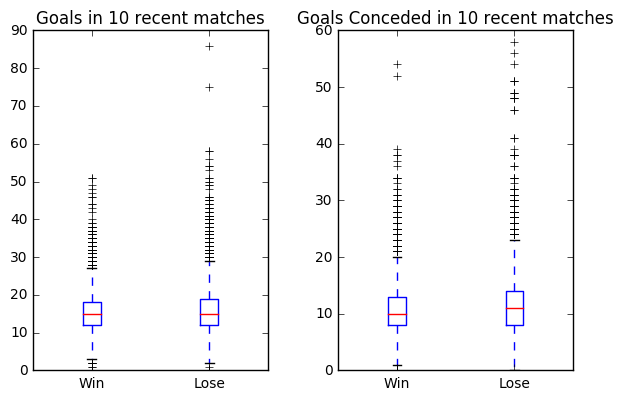

In [58]:
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
# basic plot
axs[0].boxplot([win_goalF,lose_goalF],labels=['Win','Lose'])
axs[0].set_title('Goals in 10 recent matches')

# notched plot
axs[1].boxplot([win_goalA,lose_goalA],labels=['Win','Lose'])
axs[1].set_title('Goals Conceded in 10 recent matches')

plt.show()

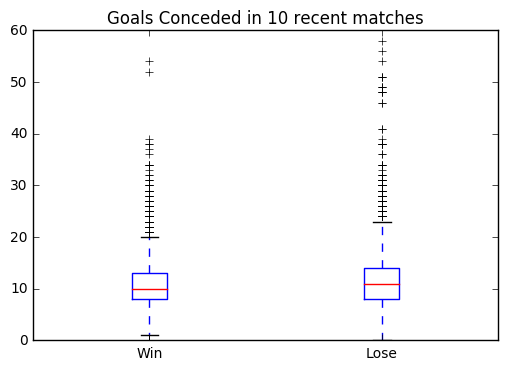

In [52]:
win_goalA = pd.concat([win_result['f_goalA_1'], lose_result['f_goalA_2']])
lose_goalA = pd.concat([lose_result['f_goalA_1'], win_result['f_goalA_2']])


plt.figure()
plt.boxplot([win_goalA,lose_goalA],labels=['Win','Lose'])
plt.title('Goals Conceded in 10 recent matches')
plt.show()

In [20]:
print(home1.shape[0])
print(home2.shape[0])

2779
2894


In [21]:
data_2005.shape[0]

11958

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000179B8A34390>], dtype=object)

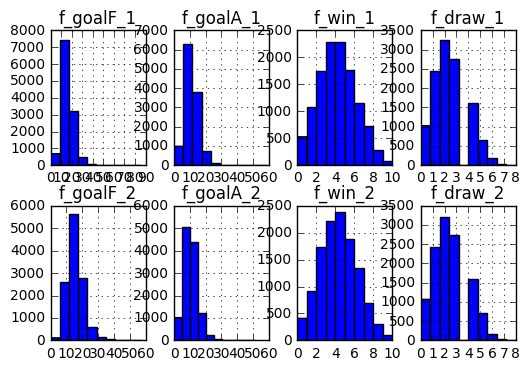

In [18]:
fig, axes = plt.subplots(2, 4)
data_2005.hist('f_goalF_1', ax=axes[0,0])
data_2005.hist('f_goalA_1', ax=axes[0,1])
data_2005.hist('f_win_1', ax=axes[0,2])
data_2005.hist('f_draw_1', ax=axes[0,3])

data_2005.hist('f_goalF_2', ax=axes[1,0])
data_2005.hist('f_goalA_2', ax=axes[1,1])
data_2005.hist('f_win_2', ax=axes[1,2])
data_2005.hist('f_draw_2', ax=axes[1,3])

# data_2005.hist('f_goalF_1',bins=100, ax=axes[0,0])
# data_2005.hist('f_goalA_1',bins=100, ax=axes[0,1])
# data_2005.hist('f_win_1',bins=100, ax=axes[0,2])
# data_2005.hist('f_draw_1',bins=100, ax=axes[0,3])

# data_2005.hist('f_goalF_2',bins=100, ax=axes[1,0])
# data_2005.hist('f_goalA_2',bins=100, ax=axes[1,1])
# data_2005.hist('f_win_2',bins=100, ax=axes[1,2])
# data_2005.hist('f_draw_2',bins=100, ax=axes[1,3])

In [ ]:
data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data[:,[]])

plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000179B5DE3978>], dtype=object)

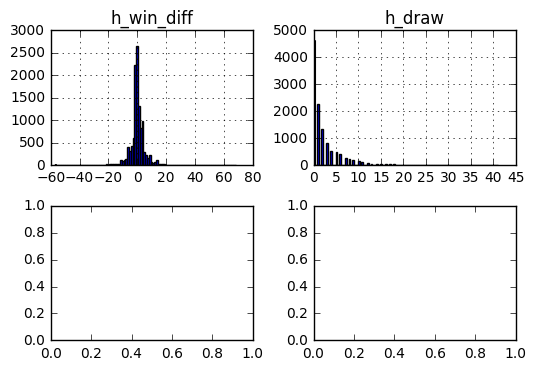

In [15]:
fig, axes = plt.subplots(2, 2)
data_2005.hist('h_win_diff',bins=100, ax=axes[0,0])
data_2005.hist('h_draw',bins=100, ax=axes[0,1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000179B3E46F98>], dtype=object)

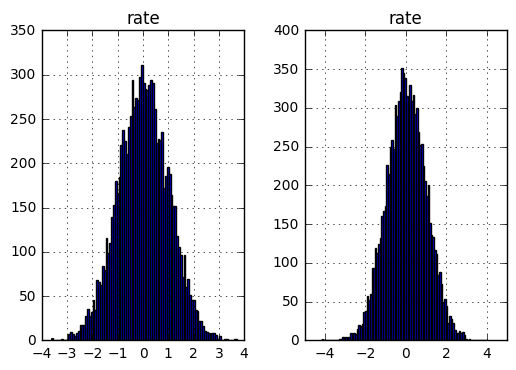

In [9]:
dflux = pd.DataFrame(dict(rate=np.random.randn(10000)))
dflux2 = pd.DataFrame(dict(rate=np.random.randn(10000)))

fig, axes = plt.subplots(1, 2)

dflux.hist('rate', bins=100, ax=axes[0])
dflux2.hist('rate', bins=100, ax=axes[1])

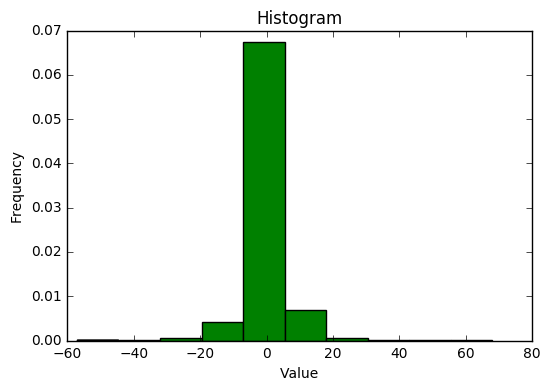

In [8]:
plt.hist(data_2005['h_win_diff'], facecolor='green')
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# import plotly.plotly as py
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

gaussian_numbers = np.random.randn(1000)
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")